# Lineage Tracking for Cells in the Mother Machine

In [1]:
from LineageTrack.lineage_tracker import LineageTrack
from LineageTrack.visualiser import Visualiser
from LineageTrack.measure_properties import generate_csv
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image, display, HTML
import pandas as pd
import ast

### comment out ###
from jupyterthemes import jtplot
jtplot.style(theme='oceans16')

In [2]:
exp_dir = "F:\\Cambridge\\MENG\\UROP 2022\\Data\\SyMBac\\T100-400_iter32_lysis004\\"
mask_dir = exp_dir + "masks\\"
channel_image_dir = exp_dir + "convolutions\\"
lineage_dir = exp_dir + "truth\\"
csv_save_dir = exp_dir + "csv\\"
result_save_dir = exp_dir + "results\\"
vis_save_dir = exp_dir + "track\\"

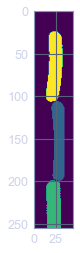

In [3]:
import tifffile

image = tifffile.imread(mask_dir + "\\synth_00037.tif")
# np.set_printoptions(threshold=100000)
# print(image)
plt.imshow(image)
plt.show()

# Measure cell properties from the images

In [5]:
generate_csv(mask_dir, channel_image_dir, save_dir=csv_save_dir)

'saved to F:\\Cambridge\\MENG\\UROP 2022\\Data\\SyMBac\\T100-400_iter32_lysis004\\csv\\symbac_test.csv'

# Setup to start tracking

In [6]:
exp = LineageTrack.from_path(csv_save_dir)
print(exp)
display(exp.df.head(1))

Looking for data at these locations:
F:\Cambridge\MENG\UROP 2022\Data\SyMBac\T100-400_iter32_lysis004\csv\symbac_test.csv
Finished loading the data
(979, 9)

                Read 1 files
                Channels: ['PC']
                Properties for each cell: ['PC_intensity_mean', 'area', 'centroid-0', 'centroid-1', 'label', 'major_axis_length', 'minor_axis_length', 'time_(mins)', 'trench_id']
            


trench_id  time_(mins)  label  area  major_axis_length  minor_axis_length  \
0          1            0      1   772          64.609299          15.999419   

   centroid-0  centroid-1  PC_intensity_mean  
0   53.610104   26.229275       17484.285156

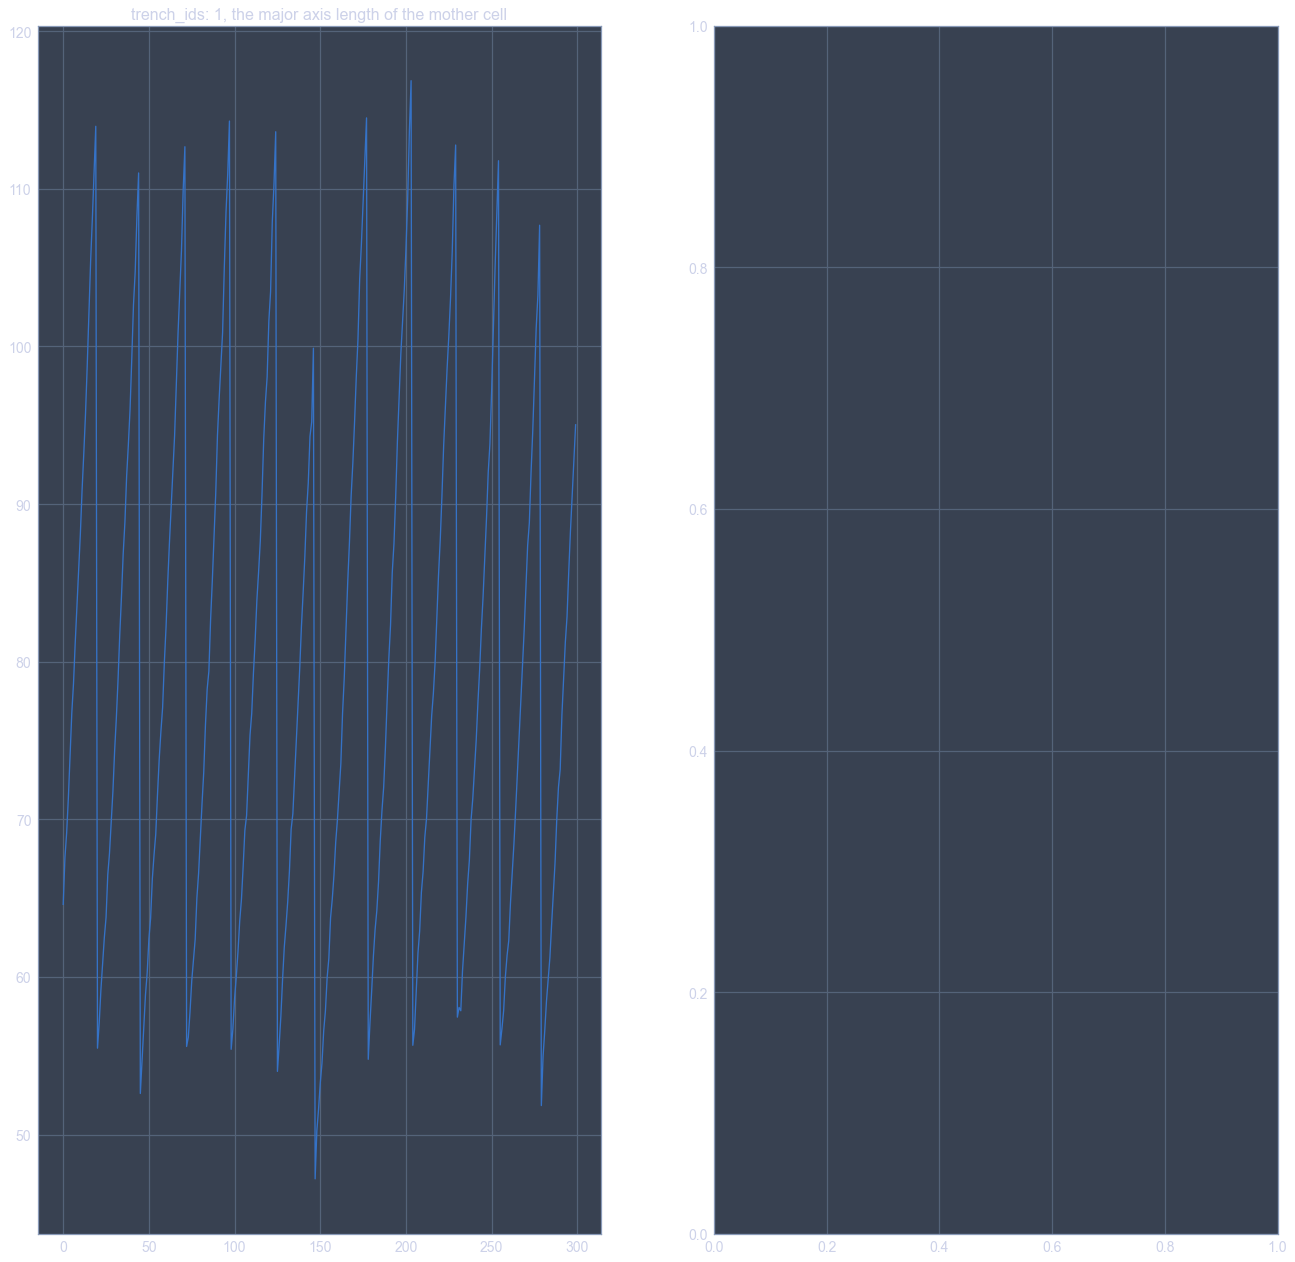

In [7]:
trench_list = [1]
m = exp.get_mother_cell_growth([1], plot=True)

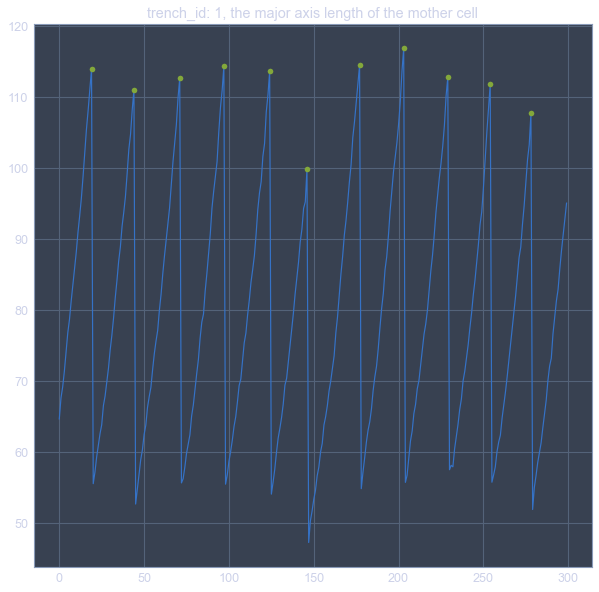

In [8]:
mcell1, idx1 = exp.find_division(1, threshold=0.5)

In [9]:
e_phase_idx1 = idx1[:]
exp.collect_model_para(mcell1, e_phase_idx1, plot=False)

In [10]:
exp.update_model_para(model="unif")


                    The average time interval for division is 25.9
                    The time constant for exponential growth is 24.058890259948658
                    The average division length is 111.72812999378552 with variance 18.925075757585674
                    


In [11]:
# track_df, lysis_df = exp.track_trench(trench=1, threshold=-1, max_dpf=3, show_details=False, ret_df=True)

In [12]:
exp.track_trenches(trenches=[1], threshold=-1, max_dpf=3, show_details=True, save_dir=result_save_dir)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Tracking over frames:   4%|█████                                                                                                                         | 12/299 [00:00<00:05, 56.97it/s]

looking at cells: 
cell in trench 1.0 at 0.0 min with label 1.0
cell in trench 1.0 at 0.0 min with label 2.0
cell in trench 1.0 at 0.0 min with label 3.0
cell in trench 1.0 at 0.0 min with label 4.0
the simulated scenario: ['SP', 'SP', 'SP', 'SP']
with probability: 0
score: 0.0
14.147598841025745
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Growing']
with probability: 0.8468271252668669
score: 0.0031121223246870166
9.79996440177478
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Growing']
with probability: 1.7998361915986937e-26
score: 6.763302023650832e-16
88.8738029351797
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Growing']
with probability: 1.6845032026690662e-19
score: 1.7098918127291843e-12
50.47171260209631
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Growing']
with probability: 1.1995147439498467e-32
score: 1.4391640347916587e-17
42.59874215566623
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Divided!']
with 

Tracking over frames:   6%|███████▌                                                                                                                      | 18/299 [00:00<00:05, 50.09it/s]

looking at cells: 
cell in trench 1.0 at 12.0 min with label 1.0
cell in trench 1.0 at 12.0 min with label 2.0
cell in trench 1.0 at 12.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
11.36604080410557
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8247671650125356
score: 0.004004497225208669
8.822543720952437
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 1.4443665746321051e-05
score: 1.2211509885988767e-07
97.91306431006606
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 0.007216771113629642
score: 4.1335697032943435e-06
64.68517580983671
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 6.4091947620407685e-27
score: 6.1898693329070154e-15
31.075345261977112
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 4.212769945054226e-08
score: 6.352079767072997e-09
125.53489442729182
the simulated scena

Tracking over frames:   8%|██████████                                                                                                                    | 24/299 [00:00<00:09, 29.48it/s]

the simulated scenario: ['Divided!', 'Divided!', 'Divided!', 'Growing']
with probability: 2.0176880940722443e-92
score: 1.544523281312988e-42
113.04695307398175
the simulated scenario: ['Divided!', 'Divided!', 'Growing', 'Divided!']
with probability: 5.405711366837356e-89
score: 3.792365428365635e-41
111.09445556535705
the simulated scenario: ['Divided!', 'Growing', 'Divided!', 'Divided!']
with probability: 6.275541152054983e-90
score: 1.652322184369376e-41
109.74539237067124
the simulated scenario: ['Growing', 'Divided!', 'Divided!', 'Divided!']
with probability: 5.757072008815273e-83
score: 1.2036959400684224e-38
102.19403512351336
RESULT:
0.0017776173608405911
['Growing', 'Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 22.0 min with label 1.0
cell in trench 1.0 at 22.0 min with label 2.0
cell in trench 1.0 at 22.0 min with label 3.0
cell in trench 1.0 at 22.0 min with label 4.0
the simulated scenario: ['SP', 'SP', 'SP', 'SP']
with probability: 0
score: 0.

Tracking over frames:  10%|█████████████                                                                                                                 | 31/299 [00:01<00:15, 17.67it/s]

the simulated scenario: ['SP', 'SP', 'SP', 'SP']
with probability: 0
score: 0.0
11.288359040306826
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Growing']
with probability: 0.8468271252667279
score: 0.23571911889076716
1.7357582499108415
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Growing']
with probability: 4.1509490238600856e-23
score: 2.9959436656974065e-14
67.34263830228599
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Growing']
with probability: 2.308387319063885e-14
score: 2.58178553843894e-10
45.01542173359166
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Growing']
with probability: 1.2529394207644157e-17
score: 1.4027556920631591e-11
43.33871157003255
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Divided!']
with probability: 1.9369439927157176e-63
score: 2.0707312137852812e-26
1.7357582499108415
the simulated scenario: ['Divided!', 'Divided!', 'Growing', 'Growing']
with probability: 4.243191055261646e-37
scor

Tracking over frames:  12%|███████████████▏                                                                                                              | 36/299 [00:01<00:16, 16.14it/s]

looking at cells: 
cell in trench 1.0 at 31.0 min with label 1.0
cell in trench 1.0 at 31.0 min with label 2.0
cell in trench 1.0 at 31.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
13.411090719580992
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8827668420471808
score: 0.09400660361232971
2.5238992642960616
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 1.602353448344333e-15
score: 2.3676423172742866e-11
76.38971568973435
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 1.471961224863764e-08
score: 3.861350597397675e-08
51.542766465118675
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 9.835599389031861e-11
score: 5.968998604788656e-09
48.807610035275005
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 8.906097027915408e-24
score: 5.438525427775578e-15
104.17356391362102
the simulated scenar

Tracking over frames:  14%|██████████████████                                                                                                            | 43/299 [00:02<00:13, 18.54it/s]

the simulated scenario: ['Divided!', 'Growing', 'Divided!']
with probability: 1.40451444325095e-34
score: 3.138466987224925e-19
96.58666430426622
the simulated scenario: ['Growing', 'Divided!', 'Divided!']
with probability: 2.09163623973344e-30
score: 1.808732598686392e-17
88.78263673302598
the simulated scenario: ['Divided!', 'Divided!', 'Divided!']
with probability: 1.0194733604353274e-36
score: 2.2434686552849217e-20
126.17465869584672
RESULT:
0.002709326442602072
['Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 38.0 min with label 1.0
cell in trench 1.0 at 38.0 min with label 2.0
cell in trench 1.0 at 38.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
8.796513566152008
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.33896646506092354
score: 0.0025675303715007496
9.14152900677978
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 9.659885423369555e-06
sc

Tracking over frames:  16%|████████████████████▋                                                                                                         | 49/299 [00:02<00:13, 17.93it/s]

looking at cells: 
cell in trench 1.0 at 43.0 min with label 1.0
cell in trench 1.0 at 43.0 min with label 2.0
cell in trench 1.0 at 43.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
8.926196290425187
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.4684025067473439
score: 0.10596263270102987
2.1738920668330692
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 0.051668773953087305
score: 2.6468853037977396e-06
105.93084971568405
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 2.5538366432417503e-34
score: 5.852597070813089e-18
32.9770230647942
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 1.8033338898415075e-25
score: 1.2814559625897414e-14
39.617832237393976
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 9.390328925228188e-36
score: 8.44337701959338e-20
105.93084971568405
the simulated scenari

Tracking over frames:  18%|███████████████████████▏                                                                                                      | 55/299 [00:02<00:11, 21.24it/s]

looking at cells: 
cell in trench 1.0 at 49.0 min with label 1.0
cell in trench 1.0 at 49.0 min with label 2.0
cell in trench 1.0 at 49.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
4.355991528495033
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8827669608818176
score: 0.008771655190140776
6.517825825467124
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 1.7156456925887902e-31
score: 1.3236710028183365e-17
67.42118705220079
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 5.820515556335934e-25
score: 1.819893908206575e-14
41.53128840064375
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 1.3573350591513186e-22
score: 1.9704917905354342e-13
38.31775698421683
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 3.7706978494447317e-56
score: 1.0385843328730688e-27
84.26568791204635
the simulated scena

Tracking over frames:  20%|█████████████████████████▋                                                                                                    | 61/299 [00:02<00:12, 19.51it/s]

the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.882766958471973
score: 0.010423354333314124
6.083203856344247
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 3.302915472980203e-16
score: 1.1633198208277626e-11
78.83951472413055
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 3.0047945289331163e-10
score: 7.778867064995009e-09
52.49087651454264
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 1.3460776621343978e-14
score: 2.2423301387552302e-10
43.688928861335285
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 3.747528249100768e-26
score: 6.034185977720712e-16
104.60482323522771
the simulated scenario: ['Divided!', 'Growing', 'Divided!']
with probability: 1.678804995070084e-30
score: 1.4022328695838694e-17
94.90126100611799
the simulated scenario: ['Growing', 'Divided!', 'Divided!']
with probability: 1.5272761611972412e-24
score: 3.86185537339

Tracking over frames:  23%|████████████████████████████▋                                                                                                 | 68/299 [00:03<00:13, 17.73it/s]

looking at cells: 
cell in trench 1.0 at 64.0 min with label 1.0
cell in trench 1.0 at 64.0 min with label 2.0
cell in trench 1.0 at 64.0 min with label 3.0
cell in trench 1.0 at 64.0 min with label 4.0
the simulated scenario: ['SP', 'SP', 'SP', 'SP']
with probability: 0
score: 0.0
14.66611443137997
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Growing']
with probability: 0.7929426438811382
score: 0.018115401445869164
4.7935746926808855
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Growing']
with probability: 6.281143647710629e-06
score: 1.089871277550896e-07
89.68836627686339
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Growing']
with probability: 0.008952056573162484
score: 5.037073140040408e-06
61.86376509370691
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Growing']
with probability: 3.8441352109623514e-36
score: 1.2311390355005522e-18
31.437278619817814
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Divided!']
wit

Tracking over frames:  24%|██████████████████████████████▎                                                                                               | 72/299 [00:03<00:14, 16.20it/s]

the simulated scenario: ['Growing', 'Growing', 'Growing', 'Divided!']
with probability: 1.5250005317675034e-69
score: 5.669322837998435e-30
4.874282811329682
the simulated scenario: ['Divided!', 'Divided!', 'Growing', 'Growing']
with probability: 1.0985121221889976e-38
score: 5.564196348488447e-21
106.74997889626
the simulated scenario: ['Divided!', 'Growing', 'Divided!', 'Growing']
with probability: 2.442654357933406e-34
score: 3.3346767421727277e-19
102.99981071344695
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Divided!']
with probability: 3.6738511550647524e-71
score: 6.222394706490161e-34
102.99981071344695
the simulated scenario: ['Growing', 'Divided!', 'Divided!', 'Growing']
with probability: 2.838497153944079e-69
score: 1.1132275482654494e-32
65.14192318688534
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Divided!']
with probability: 4.2692147637655135e-106
score: 1.2177732830803551e-46
32.109171790408816
the simulated scenario: ['Growing', 'Growing

Tracking over frames:  25%|████████████████████████████████                                                                                              | 76/299 [00:04<00:21, 10.53it/s]

looking at cells: 
cell in trench 1.0 at 74.0 min with label 1.0
cell in trench 1.0 at 74.0 min with label 2.0
cell in trench 1.0 at 74.0 min with label 3.0
cell in trench 1.0 at 74.0 min with label 4.0
the simulated scenario: ['SP', 'SP', 'SP', 'SP']
with probability: 0
score: 0.0
11.131072043242776
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Growing']
with probability: 0.8468271252668669
score: 0.013062776732143224
5.521193399525442
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Growing']
with probability: 2.343567546574208e-34
score: 6.745426276696075e-19
77.19277186696223
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Growing']
with probability: 2.9409415019988056e-27
score: 2.2290359543332027e-15
41.277272483721845
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Growing']
with probability: 1.8257000887670514e-28
score: 7.949892075861515e-16
39.96540484700437
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Divided!']
w

Tracking over frames:  27%|██████████████████████████████████▏                                                                                           | 81/299 [00:04<00:24,  8.74it/s]

looking at cells: 
cell in trench 1.0 at 78.0 min with label 1.0
cell in trench 1.0 at 78.0 min with label 2.0
cell in trench 1.0 at 78.0 min with label 3.0
cell in trench 1.0 at 78.0 min with label 4.0
the simulated scenario: ['SP', 'SP', 'SP', 'SP']
with probability: 0
score: 0.0
15.736790533789968
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Growing']
with probability: 0.8468271252668669
score: 0.003452508405612496
9.401415866278665
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Growing']
with probability: 4.9218245196970556e-26
score: 1.0664883735349257e-15
87.00770831247246
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Growing']
with probability: 1.0728728247453422e-19
score: 1.4452385686328039e-12
50.224069811597495
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Growing']
with probability: 1.0139104915165874e-20
score: 5.824504242106036e-13
49.52863423371704
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Divided!']

Tracking over frames:  28%|███████████████████████████████████▊                                                                                          | 85/299 [00:05<00:20, 10.68it/s]

the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
9.395386967640984
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8827669608542463
score: 0.049333403028257075
3.2664720135636847
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 2.238064105746098e-18
score: 1.6620875621723444e-12
77.21791017373167
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 3.1547869313941093e-12
score: 1.6485131385428918e-09
47.09754179372893
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 2.8317818870719687e-13
score: 6.194912983235124e-10
47.371319700633784
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 2.6660926025888466e-30
score: 1.527500667759099e-17
98.75235772857933
the simulated scenario: ['Divided!', 'Growing', 'Divided!']
with probability: 2.3931228654898054e-31
score: 5.791954540672865e-18
98.97017577519821
the simulated scenario: ['G

Tracking over frames:  29%|████████████████████████████████████▋                                                                                         | 87/299 [00:05<00:19, 11.10it/s]

looking at cells: 
cell in trench 1.0 at 85.0 min with label 1.0
cell in trench 1.0 at 85.0 min with label 2.0
cell in trench 1.0 at 85.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
11.994990211215447
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8827668067582753
score: 0.07836135236525286
2.7145296530113963
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 2.9232807331673534e-13
score: 1.5475261676913602e-10
82.92473327831459
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 1.4811316519035556e-08
score: 3.901433335360638e-08
51.38132623290529
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 4.406676273414367e-09
score: 2.4509983784369126e-08
50.970697185910616
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 1.6349216229949771e-21
score: 4.041212273228094e-14
107.53623935745551
the simulated sce

Tracking over frames:  31%|███████████████████████████████████████▏                                                                                      | 93/299 [00:05<00:19, 10.75it/s]

looking at cells: 
cell in trench 1.0 at 89.0 min with label 1.0
cell in trench 1.0 at 89.0 min with label 2.0
cell in trench 1.0 at 89.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
15.676753410247688
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8740715556885021
score: 0.002000981050357728
11.753043070415995
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 1.279829244577452e-06
score: 4.633878825716376e-08
97.89634004798855
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 0.0010829725758625289
score: 1.7265107383542202e-06
67.71284789378898
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 1.4839016377814931e-19
score: 4.784688762656924e-12
32.77052063130263
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 5.285684620227216e-10
score: 1.068485402252005e-09
127.11264688489236
the simulated scenar

Tracking over frames:  32%|████████████████████████████████████████▉                                                                                     | 97/299 [00:06<00:16, 12.10it/s]

looking at cells: 
cell in trench 1.0 at 95.0 min with label 1.0
cell in trench 1.0 at 95.0 min with label 2.0
cell in trench 1.0 at 95.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
6.094644878199318
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.444836326959751
score: 0.009166245502555766
5.738989701420651
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 0.054607335898335135
score: 2.8636620847684934e-06
103.55985901445626
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 1.614904444424923e-36
score: 6.711743284489411e-19
34.87942830664976
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 1.4202636893581578e-29
score: 3.4277521920672196e-16
37.18564085875802
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 6.608095614487672e-38
score: 1.1092835134244287e-20
107.9431748701068
the simulated scenario

Tracking over frames:  33%|█████████████████████████████████████████▋                                                                                    | 99/299 [00:06<00:20,  9.65it/s]

the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Divided!']
with probability: 7.052832568929266e-54
score: 1.2033817695192836e-26
73.0426970224456
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Divided!']
with probability: 1.9672980061023303e-52
score: 4.557862084522239e-26
73.03226204663514
the simulated scenario: ['Divided!', 'Divided!', 'Divided!', 'Growing']
with probability: 3.583552515697514e-97
score: 2.0679362758228786e-44
110.27456239886361
the simulated scenario: ['Divided!', 'Divided!', 'Growing', 'Divided!']
with probability: 2.9202627297464304e-91
score: 4.799530612672245e-42
110.15088776012237
the simulated scenario: ['Divided!', 'Growing', 'Divided!', 'Divided!']
with probability: 8.145701729592159e-90
score: 1.8329219700861326e-41
109.77184654352472
the simulated scenario: ['Growing', 'Divided!', 'Divided!', 'Divided!']
with probability: 3.2410095375116528e-83
score: 8.936310474798534e-39
105.01360070368862
RESULT:
0.0030827927092560905
['Growing

Tracking over frames:  34%|██████████████████████████████████████████▋                                                                                  | 102/299 [00:07<00:33,  5.96it/s]

looking at cells: 
cell in trench 1.0 at 101.0 min with label 1.0
cell in trench 1.0 at 101.0 min with label 2.0
cell in trench 1.0 at 101.0 min with label 3.0
cell in trench 1.0 at 101.0 min with label 4.0
the simulated scenario: ['SP', 'SP', 'SP', 'SP']
with probability: 0
score: 0.0
11.829430947576906
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Growing']
with probability: 0.8468271252668669
score: 0.002260148196274613
11.137619970489446
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Growing']
with probability: 1.1523819808401452e-31
score: 6.5321825117574894e-18
83.91355283568383
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Growing']
with probability: 1.338366504180053e-23
score: 4.6813257193006987e-14
47.00071508922979
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Growing']
with probability: 5.085607358507616e-24
score: 3.064646073021423e-14
47.69388736716593
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Divided!

Tracking over frames:  35%|███████████████████████████████████████████▉                                                                                 | 105/299 [00:07<00:33,  5.80it/s]

looking at cells: 
cell in trench 1.0 at 103.0 min with label 1.0
cell in trench 1.0 at 103.0 min with label 2.0
cell in trench 1.0 at 103.0 min with label 3.0
cell in trench 1.0 at 103.0 min with label 4.0
the simulated scenario: ['SP', 'SP', 'SP', 'SP']
with probability: 0
score: 0.0
14.708660695249222
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Growing']
with probability: 0.8468271252668669
score: 0.002990813693554138
9.95706672706022
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Growing']
with probability: 1.3149060869652952e-27
score: 2.585631855237521e-16
85.90065628209098
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Growing']
with probability: 7.726406622943215e-21
score: 5.104570547403764e-13
49.99110373891574
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Growing']
with probability: 1.662583108973126e-19
score: 1.7102287752459006e-12
50.36207952894878
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Divided!']


Tracking over frames:  36%|█████████████████████████████████████████████▌                                                                               | 109/299 [00:08<00:23,  8.01it/s]

looking at cells: 
cell in trench 1.0 at 106.0 min with label 1.0
cell in trench 1.0 at 106.0 min with label 2.0
cell in trench 1.0 at 106.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
10.295133793351635
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8827669608816294
score: 0.07015696050654097
2.8373118060819897
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 8.84696614569367e-22
score: 1.0059391992459048e-13
67.67969699311912
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 3.8281305986814273e-16
score: 5.281527657167675e-11
44.07314638660858
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 2.3101028118381272e-14
score: 2.2745370985118637e-10
47.36132016039486
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 1.2788328558046976e-37
score: 2.21459867613991e-20
90.98550110617713
the simulated scen

Tracking over frames:  38%|███████████████████████████████████████████████▏                                                                             | 113/299 [00:08<00:20,  9.11it/s]

looking at cells: 
cell in trench 1.0 at 110.0 min with label 1.0
cell in trench 1.0 at 110.0 min with label 2.0
cell in trench 1.0 at 110.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
11.51640297857206
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8827664566988483
score: 0.17841891450334035
1.9532551339245268
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 2.780239773319292e-15
score: 2.8475456527196864e-11
77.49342966270831
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 1.6130931414371525e-10
score: 7.305908179003832e-09
48.72544647432422
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 6.270729446195156e-08
score: 7.398300398806723e-08
50.10927342514611
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 1.6934587382878237e-25
score: 1.2155748911648404e-15
100.62160740777881
the simulated sce

Tracking over frames:  38%|███████████████████████████████████████████████▋                                                                             | 114/299 [00:08<00:25,  7.19it/s]

looking at cells: 
cell in trench 1.0 at 113.0 min with label 1.0
cell in trench 1.0 at 113.0 min with label 2.0
cell in trench 1.0 at 113.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
9.610216276777358
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8827585607450112
score: 0.006021296539649085
7.576326873703741
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 2.9316084063582005e-10
score: 2.097821174883943e-09
88.3140023898647
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 1.046377430406521e-06
score: 1.5064542189247402e-07
59.15177250814697
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 7.763151769394263e-10
score: 1.9283015965489055e-08
42.494831149585785
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 1.1583268659607033e-16
score: 3.0538233178078022e-12
113.83489674463894
the simulated sc

Tracking over frames:  39%|████████████████████████████████████████████████▉                                                                            | 117/299 [00:09<00:23,  7.79it/s]

looking at cells: 
cell in trench 1.0 at 115.0 min with label 1.0
cell in trench 1.0 at 115.0 min with label 2.0
cell in trench 1.0 at 115.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
14.676375504660768
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8810475724271261
score: 0.0022526484391646724
11.22335060441843
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 4.128059515019102e-08
score: 1.3408241965591281e-08
92.80483790657712
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 0.00021435611556545916
score: 1.0320265854590898e-06
64.19561835984986
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 5.251717737505025e-16
score: 1.0193146990987897e-10
35.63895041574682
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 3.347813179655587e-12
score: 1.5797768532072877e-10
121.48523436543425
the simulated 

Tracking over frames:  40%|█████████████████████████████████████████████████▋                                                                           | 119/299 [00:09<00:24,  7.44it/s]

the simulated scenario: ['Divided!', 'Divided!', 'Growing', 'Growing']
with probability: 2.0848740754167757e-07
score: 1.2435432836029758e-08
123.93341307996593
the simulated scenario: ['Divided!', 'Growing', 'Divided!', 'Growing']
with probability: 4.649991553728101e-43
score: 1.1395469963735517e-22
100.94840233437607
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Divided!']
with probability: 1.1905463266101678e-122
score: 1.8865835202957306e-54
95.90671003893095
the simulated scenario: ['Growing', 'Divided!', 'Divided!', 'Growing']
with probability: 1.1840277994231828e-40
score: 1.4264384632163018e-21
89.13262307543437
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Divided!']
with probability: 3.031489263840536e-120
score: 5.542606762416911e-53
60.19762242036641
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Divided!']
with probability: 6.761271406407592e-156
score: 1.564785235776803e-66
31.26242358611598
the simulated scenario: ['Divided!', 'Di

Tracking over frames:  40%|██████████████████████████████████████████████████▌                                                                          | 121/299 [00:09<00:22,  7.97it/s]

looking at cells: 
cell in trench 1.0 at 120.0 min with label 1.0
cell in trench 1.0 at 120.0 min with label 2.0
cell in trench 1.0 at 120.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
118.25566783651894
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.1369636483888668
score: 2.5116909454113934e-06
126.43589018051438
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 0.0009068746509867712
score: 2.0493442019148785e-07
154.36953610875472
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 0.08744689738213338
score: 0.0002543337964876233
18.55741479535884
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 4.157475702462497e-56
score: 3.374364777310118e-28
134.19487913648058
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 0.00019300346107929873
score: 1.9162474697061392e-07
123.79690232024123
the simulated 

Tracking over frames:  41%|███████████████████████████████████████████████████▍                                                                         | 123/299 [00:10<00:26,  6.72it/s]

the simulated scenario: ['Divided!', 'Divided!', 'Divided!', 'Growing']
with probability: 1.5425902439946252e-70
score: 9.488996107893578e-34
109.45408769513361
the simulated scenario: ['Divided!', 'Divided!', 'Growing', 'Divided!']
with probability: 8.845830923670459e-113
score: 1.3562789115329265e-50
104.36108312647072
the simulated scenario: ['Divided!', 'Growing', 'Divided!', 'Divided!']
with probability: 8.022366208773855e-106
score: 7.794270304185992e-48
106.65426130051188
the simulated scenario: ['Growing', 'Divided!', 'Divided!', 'Divided!']
with probability: 4.8945666303578774e-141
score: 2.1351188347013133e-61
65.85450027591375
RESULT:
0.023528391512227433
['Growing', 'Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 122.0 min with label 1.0
cell in trench 1.0 at 122.0 min with label 2.0
cell in trench 1.0 at 122.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
8.41529123304852
the simulated scenario: ['G

Tracking over frames:  42%|████████████████████████████████████████████████████▎                                                                        | 125/299 [00:10<00:22,  7.62it/s]

looking at cells: 
cell in trench 1.0 at 124.0 min with label 1.0
cell in trench 1.0 at 124.0 min with label 2.0
cell in trench 1.0 at 124.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
146.7650509292638
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.10204153166768859
score: 1.391180224287807e-06
152.77453017305282
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 0.09735180061656698
score: 0.00010493233301013775
26.901178527174384
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 6.088352585638827e-34
score: 1.9256802156838897e-19
148.48627067729612
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 3.1455836528995287e-27
score: 7.429411469523601e-17
162.64863897346177
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 1.936179244253586e-34
score: 1.655817353617601e-18
52.27647767789408
the simulated s

Tracking over frames:  42%|████████████████████████████████████████████████████▋                                                                        | 126/299 [00:10<00:25,  6.73it/s]

the simulated scenario: ['Divided!', 'Divided!', 'Divided!', 'Growing']
with probability: 1.8315220492141336e-102
score: 1.90917193196578e-46
102.2614456263094
the simulated scenario: ['Divided!', 'Divided!', 'Growing', 'Divided!']
with probability: 6.272098545736499e-95
score: 2.030893882511311e-43
101.04414820121495
the simulated scenario: ['Divided!', 'Growing', 'Divided!', 'Divided!']
with probability: 4.3783741411087474e-94
score: 4.482032164739342e-43
100.46622214304092
the simulated scenario: ['Growing', 'Divided!', 'Divided!', 'Divided!']
with probability: 4.616253711594157e-87
score: 2.8952604203520496e-40
100.3717032248527
RESULT:
0.0024712247595579852
['Growing', 'Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 126.0 min with label 1.0
cell in trench 1.0 at 126.0 min with label 2.0
cell in trench 1.0 at 126.0 min with label 3.0
cell in trench 1.0 at 126.0 min with label 4.0
the simulated scenario: ['SP', 'SP', 'SP', 'SP']
with probability: 0
score:

Tracking over frames:  43%|█████████████████████████████████████████████████████▌                                                                       | 128/299 [00:10<00:30,  5.62it/s]

looking at cells: 
cell in trench 1.0 at 127.0 min with label 1.0
cell in trench 1.0 at 127.0 min with label 2.0
cell in trench 1.0 at 127.0 min with label 3.0
cell in trench 1.0 at 127.0 min with label 4.0
the simulated scenario: ['SP', 'SP', 'SP', 'SP']
with probability: 0
score: 0.0
11.732296396414322
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Growing']
with probability: 0.8468271252668669
score: 0.008650472310094965
6.510753207941792
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Growing']
with probability: 9.770889229755895e-35
score: 4.77119254494564e-19
77.07946242545124
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Growing']
with probability: 3.0137878621610165e-28
score: 8.350320443152896e-16
42.459685399080634
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Growing']
with probability: 4.046851232935756e-28
score: 1.0421405068518061e-15
40.735049427136744
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Divided!'

Tracking over frames:  43%|█████████████████████████████████████████████████████▉                                                                       | 129/299 [00:11<00:32,  5.27it/s]

the simulated scenario: ['Divided!', 'Growing', 'Divided!', 'Divided!']
with probability: 6.399117913209469e-87
score: 2.7257000892563033e-40
108.3397903107244
the simulated scenario: ['Growing', 'Divided!', 'Divided!', 'Divided!']
with probability: 6.308473394290999e-81
score: 7.123446415999747e-38
106.39269730239435
RESULT:
0.01732810457797626
['Growing', 'Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 129.0 min with label 1.0
cell in trench 1.0 at 129.0 min with label 2.0
cell in trench 1.0 at 129.0 min with label 3.0
cell in trench 1.0 at 129.0 min with label 4.0
the simulated scenario: ['SP', 'SP', 'SP', 'SP']
with probability: 0
score: 0.0
13.381080853838725
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Growing']
with probability: 0.8468271252668669
score: 0.0030691197731369385
9.854659585820928
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Growing']
with probability: 1.7526332501461147e-29
score: 4.9056850286608176e-17
83.69

Tracking over frames:  44%|██████████████████████████████████████████████████████▊                                                                      | 131/299 [00:11<00:33,  4.97it/s]

looking at cells: 
cell in trench 1.0 at 130.0 min with label 1.0
cell in trench 1.0 at 130.0 min with label 2.0
cell in trench 1.0 at 130.0 min with label 3.0
cell in trench 1.0 at 130.0 min with label 4.0
the simulated scenario: ['SP', 'SP', 'SP', 'SP']
with probability: 0
score: 0.0
15.149689764548548
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Growing']
with probability: 0.8468271252668669
score: 0.0023496147825391445
10.966006409001821
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Growing']
with probability: 6.004225923853353e-28
score: 1.852716638871994e-16
86.5823807301552
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Growing']
with probability: 7.02733949604562e-22
score: 2.0131531425198663e-13
49.423764806779005
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Growing']
with probability: 1.1881762120264189e-22
score: 9.745137123090933e-14
49.7125172577242
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Divided!']

Tracking over frames:  44%|███████████████████████████████████████████████████████▏                                                                     | 132/299 [00:11<00:34,  4.78it/s]

looking at cells: 
cell in trench 1.0 at 131.0 min with label 1.0
cell in trench 1.0 at 131.0 min with label 2.0
cell in trench 1.0 at 131.0 min with label 3.0
cell in trench 1.0 at 131.0 min with label 4.0
the simulated scenario: ['SP', 'SP', 'SP', 'SP']
with probability: 0
score: 0.0
15.858802001438072
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Growing']
with probability: 0.8468271252668669
score: 0.0028325373387528135
10.175995454867083
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Growing']
with probability: 2.724320115603204e-26
score: 8.183931444281588e-16
87.99469875825693
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Growing']
with probability: 3.494758900104314e-20
score: 9.323834116256772e-13
50.015998100106515
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Growing']
with probability: 1.665494192892567e-20
score: 7.056575610072588e-13
49.66029555292263
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Divided!'

Tracking over frames:  45%|████████████████████████████████████████████████████████                                                                     | 134/299 [00:12<00:34,  4.82it/s]

the simulated scenario: ['Growing', 'Divided!', 'Divided!', 'Growing']
with probability: 1.61788470669185e-36
score: 7.303409514284985e-20
84.72690650110216
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Divided!']
with probability: 1.9543847158024043e-73
score: 6.7310635329999875e-34
43.18452363584572
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Divided!']
with probability: 2.0129512131213308e-73
score: 6.719293753108963e-34
43.4194050924267
the simulated scenario: ['Divided!', 'Divided!', 'Divided!', 'Growing']
with probability: 9.236982895656955e-61
score: 7.470843767993724e-30
110.95246634355009
the simulated scenario: ['Divided!', 'Divided!', 'Growing', 'Divided!']
with probability: 1.1158161095615433e-97
score: 2.1997157601557232e-44
89.26232482766858
the simulated scenario: ['Divided!', 'Growing', 'Divided!', 'Divided!']
with probability: 1.1492534572140604e-97
score: 2.1836466824508022e-44
89.94842908340186
the simulated scenario: ['Growing', 'Divide

Tracking over frames:  45%|████████████████████████████████████████████████████████▊                                                                    | 136/299 [00:12<00:27,  6.03it/s]

looking at cells: 
cell in trench 1.0 at 135.0 min with label 1.0
cell in trench 1.0 at 135.0 min with label 2.0
cell in trench 1.0 at 135.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
7.1451698603225235
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8827669608757645
score: 0.027942575223970263
4.100424311376752
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 1.0981759989939106e-18
score: 1.2599128502165433e-12
76.97883061992476
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 3.256864461822337e-13
score: 6.892185532249915e-10
46.42000316418747
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 4.291108141300992e-13
score: 7.867480478677472e-10
46.0126073739441
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 1.3505302238925626e-31
score: 4.778610484996853e-18
97.53489855127944
the simulated scena

Tracking over frames:  46%|█████████████████████████████████████████████████████████▋                                                                   | 138/299 [00:12<00:23,  6.73it/s]

the simulated scenario: ['Divided!', 'Divided!', 'Divided!']
with probability: 6.704845806875787e-41
score: 5.181721488681227e-22
122.0204382754981
RESULT:
0.2210417024011533
['Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 137.0 min with label 1.0
cell in trench 1.0 at 137.0 min with label 2.0
cell in trench 1.0 at 137.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
11.523203868462137
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8827669588614
score: 1.732243769239414
0.7868496717428548
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 9.135198996887602e-15
score: 4.504621735727454e-11
78.02819322019467
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 1.7355358696229695e-10
score: 7.692258884004512e-09
48.293404015300176
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 7.837129681947846e-11
score: 

Tracking over frames:  47%|██████████████████████████████████████████████████████████▌                                                                  | 140/299 [00:13<00:22,  7.12it/s]

the simulated scenario: ['Growing', 'Divided!', 'Divided!']
with probability: 8.899505002028285e-18
score: 1.6512673030598022e-12
96.55429199770383
the simulated scenario: ['Divided!', 'Divided!', 'Divided!']
with probability: 4.1901646272828475e-31
score: 3.781850084891184e-18
128.37346101255375
RESULT:
0.058872114805283544
['Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 139.0 min with label 1.0
cell in trench 1.0 at 139.0 min with label 2.0
cell in trench 1.0 at 139.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
10.915780252026966
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8827654365359692
score: 0.004419024543014643
8.574418680194778
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 2.5440077213320513e-11
score: 8.056991412634235e-10
87.58178407885643
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 1.7786795602489614e

Tracking over frames:  47%|███████████████████████████████████████████████████████████▎                                                                 | 142/299 [00:13<00:21,  7.21it/s]

the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 2.923676220324076e-11
score: 6.614781709480893e-09
38.57824593036255
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 1.3008164811538005e-15
score: 7.479285553254845e-12
117.14682407486491
the simulated scenario: ['Divided!', 'Growing', 'Divided!']
with probability: 6.472662905005071e-21
score: 8.546015243780909e-14
99.32711310262964
the simulated scenario: ['Growing', 'Divided!', 'Divided!']
with probability: 6.487053086024795e-17
score: 4.256111064234454e-12
90.84947277728529
the simulated scenario: ['Divided!', 'Divided!', 'Divided!']
with probability: 4.7871816973469036e-27
score: 1.6848715098387772e-16
125.3678191617854
RESULT:
0.003438704322087772
['Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 141.0 min with label 1.0
cell in trench 1.0 at 141.0 min with label 2.0
cell in trench 1.0 at 141.0 min with label 3.0
the simulated scenario: ['SP', 'SP',

Tracking over frames:  48%|████████████████████████████████████████████████████████████▌                                                                | 145/299 [00:13<00:20,  7.34it/s]

looking at cells: 
cell in trench 1.0 at 143.0 min with label 1.0
cell in trench 1.0 at 143.0 min with label 2.0
cell in trench 1.0 at 143.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
13.676828630169549
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8544435570301333
score: 0.002850566274858292
10.164754257356865
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 2.486813709044998e-06
score: 5.929179636691117e-08
98.6518143797311
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 0.0035291902010655724
score: 2.797191409145783e-06
67.44335029902363
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 1.0441630594117275e-24
score: 5.392303154892012e-14
29.532023942663688
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 3.4238417512102643e-09
score: 2.3029094183127635e-09
126.06991121704519
the simulated sc

Tracking over frames:  49%|█████████████████████████████████████████████████████████████▊                                                               | 148/299 [00:14<00:22,  6.60it/s]

looking at cells: 
cell in trench 1.0 at 146.0 min with label 1.0
cell in trench 1.0 at 146.0 min with label 2.0
the simulated scenario: ['SP', 'SP']
with probability: 0
score: 0.0
258.6568243064868
the simulated scenario: ['Growing', 'Growing']
with probability: 0.2608492442779611
score: 4.882317145355129e-07
269.8807687114312
the simulated scenario: ['Divided!', 'Growing']
with probability: 0.00044527917677756126
score: 2.0613364697479966e-07
137.44268382372215
the simulated scenario: ['Growing', 'Divided!']
with probability: 0.0532748095251416
score: 1.394348102991572e-06
137.56090389103605
the simulated scenario: ['Divided!', 'Divided!']
with probability: 2.2735510882924088e-05
score: 5.550006019538588e-06
22.874698214938295
RESULT:
5.550006019538588e-06
['Divided!', 'Divided!']


looking at cells: 
cell in trench 1.0 at 147.0 min with label 1.0
cell in trench 1.0 at 147.0 min with label 2.0
cell in trench 1.0 at 147.0 min with label 3.0
cell in trench 1.0 at 147.0 min with label 4

Tracking over frames:  50%|██████████████████████████████████████████████████████████████▎                                                              | 149/299 [00:14<00:26,  5.56it/s]

looking at cells: 
cell in trench 1.0 at 148.0 min with label 1.0
cell in trench 1.0 at 148.0 min with label 2.0
cell in trench 1.0 at 148.0 min with label 3.0
cell in trench 1.0 at 148.0 min with label 4.0
the simulated scenario: ['SP', 'SP', 'SP', 'SP']
with probability: 0
score: 0.0
10.441405841676625
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Growing']
with probability: 0.8468271252668669
score: 0.07292608176629449
2.775198229060252
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Growing']
with probability: 1.8740735560460555e-44
score: 9.32549386856902e-23
65.43003082035885
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Growing']
with probability: 3.1127401168694205e-37
score: 3.625100528226827e-19
34.29058041747908
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Growing']
with probability: 3.325042620401662e-36
score: 1.0484112078545592e-18
32.7547955222868
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Divided!']
w

Tracking over frames:  50%|██████████████████████████████████████████████████████████████▋                                                              | 150/299 [00:14<00:29,  5.03it/s]

the simulated scenario: ['Divided!', 'Divided!', 'Growing', 'Divided!']
with probability: 5.1169121986004e-105
score: 1.7812336255194022e-47
103.0748995864649
the simulated scenario: ['Divided!', 'Growing', 'Divided!', 'Divided!']
with probability: 5.446871891845233e-105
score: 1.884038512508242e-47
101.79996654806445
the simulated scenario: ['Growing', 'Divided!', 'Divided!', 'Divided!']
with probability: 8.418331472075545e-98
score: 1.4452306295529314e-44
100.93953521265703
RESULT:
0.0631778190313121
['Growing', 'Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 150.0 min with label 1.0
cell in trench 1.0 at 150.0 min with label 2.0
cell in trench 1.0 at 150.0 min with label 3.0
cell in trench 1.0 at 150.0 min with label 4.0
the simulated scenario: ['SP', 'SP', 'SP', 'SP']
with probability: 0
score: 0.0
11.23228243613659
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Growing']
with probability: 0.8468271252668669
score: 0.05864386650776571
3.02801

Tracking over frames:  51%|███████████████████████████████████████████████████████████████▏                                                             | 151/299 [00:15<00:37,  3.96it/s]

the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Growing']
with probability: 3.0836908492992642e-40
score: 3.8873590069282435e-21
69.56478911000582
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Growing']
with probability: 6.460056665990344e-33
score: 1.7381876112671164e-17
35.776607162752924
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Growing']
with probability: 2.0583013321104727e-33
score: 1.098407928883902e-17
35.79776965026106
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Divided!']
with probability: 1.8923548899246257e-25
score: 1.4150978331571869e-14
38.37123942292136
the simulated scenario: ['Divided!', 'Divided!', 'Growing', 'Growing']
with probability: 8.821524945509693e-73
score: 2.188920975608988e-34
86.13803364107946
the simulated scenario: ['Divided!', 'Growing', 'Divided!', 'Growing']
with probability: 2.8107116524503105e-73
score: 1.3955793471378154e-34
85.88331384784252
the simulated scenario: ['Divided!', 'Growing',

Tracking over frames:  51%|███████████████████████████████████████████████████████████████▉                                                             | 153/299 [00:15<00:39,  3.66it/s]

looking at cells: 
cell in trench 1.0 at 152.0 min with label 1.0
cell in trench 1.0 at 152.0 min with label 2.0
cell in trench 1.0 at 152.0 min with label 3.0
cell in trench 1.0 at 152.0 min with label 4.0
the simulated scenario: ['SP', 'SP', 'SP', 'SP']
with probability: 0
score: 0.0
10.801445317138864
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Growing']
with probability: 0.8468271252668669
score: 0.03417745750227209
3.757952279862362
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Growing']
with probability: 6.892307106148777e-36
score: 1.8089486294687654e-19
74.33063546794169
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Growing']
with probability: 1.0538045948316712e-28
score: 6.807917078068195e-16
38.94358343925023
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Growing']
with probability: 3.414419860761025e-30
score: 2.0240217527933656e-16
36.5464028856806
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Divided!']


Tracking over frames:  52%|████████████████████████████████████████████████████████████████▍                                                            | 154/299 [00:15<00:42,  3.45it/s]

the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Growing']
with probability: 1.2866652464356698e-28
score: 5.87309864589204e-16
42.65476691602309
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Divided!']
with probability: 1.2284809627041474e-20
score: 1.316689133335945e-12
36.8557835246134
the simulated scenario: ['Divided!', 'Divided!', 'Growing', 'Growing']
with probability: 2.709389567191427e-60
score: 1.6431920235432037e-29
96.15770853711845
the simulated scenario: ['Divided!', 'Growing', 'Divided!', 'Growing']
with probability: 1.4657526184101253e-62
score: 2.0583584867704074e-30
95.75496521262986
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Divided!']
with probability: 1.3994698253790317e-54
score: 3.5413590612329274e-27
91.97847002891638
the simulated scenario: ['Growing', 'Divided!', 'Divided!', 'Growing']
with probability: 1.3551220862909066e-54
score: 5.2753934554322415e-27
78.02155564149996
the simulated scenario: ['Growing', 'Divided!',

Tracking over frames:  52%|████████████████████████████████████████████████████████████████▊                                                            | 155/299 [00:16<00:42,  3.35it/s]

the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Growing']
with probability: 6.436138017850412e-25
score: 1.365944228480785e-14
47.33766902095675
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Growing']
with probability: 2.713905908387015e-26
score: 4.190184674434251e-15
45.759566358686826
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Divided!']
with probability: 2.066109342452337e-23
score: 1.4344778257392053e-13
32.19192835742768
the simulated scenario: ['Divided!', 'Divided!', 'Growing', 'Growing']
with probability: 2.6745506401225204e-56
score: 6.090978744044213e-28
98.73822107936262
the simulated scenario: ['Divided!', 'Growing', 'Divided!', 'Growing']
with probability: 1.1277692871684281e-57
score: 1.6866299045877536e-28
99.43684210104004
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Divided!']
with probability: 8.585760667488918e-55
score: 3.3131805346468084e-27
87.35878074998679
the simulated scenario: ['Growing', 'Divided!', '

Tracking over frames:  53%|█████████████████████████████████████████████████████████████████▋                                                           | 157/299 [00:16<00:40,  3.48it/s]

looking at cells: 
cell in trench 1.0 at 156.0 min with label 1.0
cell in trench 1.0 at 156.0 min with label 2.0
cell in trench 1.0 at 156.0 min with label 3.0
cell in trench 1.0 at 156.0 min with label 4.0
the simulated scenario: ['SP', 'SP', 'SP', 'SP']
with probability: 0
score: 0.0
12.6104398286606
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Growing']
with probability: 0.8468271252668669
score: 0.002757318569115155
10.286138874361676
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Growing']
with probability: 2.137351200220666e-27
score: 3.0609102411886206e-16
86.78404816140555
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Growing']
with probability: 8.693060938716605e-21
score: 5.504836672531992e-13
49.42763837678027
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Growing']
with probability: 3.379217158465652e-22
score: 1.570170886836406e-13
48.554759575707195
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Divided!']


Tracking over frames:  53%|██████████████████████████████████████████████████████████████████                                                           | 158/299 [00:17<00:39,  3.57it/s]

the simulated scenario: ['Growing', 'Divided!', 'Divided!', 'Divided!']
with probability: 1.3516687692496444e-84
score: 2.742825973216847e-39
101.31177943662355
RESULT:
0.002983630277321954
['Growing', 'Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 158.0 min with label 1.0
cell in trench 1.0 at 158.0 min with label 2.0
cell in trench 1.0 at 158.0 min with label 3.0
cell in trench 1.0 at 158.0 min with label 4.0
the simulated scenario: ['SP', 'SP', 'SP', 'SP']
with probability: 0
score: 0.0
8.26080314228692
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Growing']
with probability: 0.8468271252668669
score: 0.05037450466075796
3.2178281471063013
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Growing']
with probability: 1.719550863194706e-24
score: 7.504695023981438e-15
70.39360145589116
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Growing']
with probability: 5.5312513693710934e-18
score: 9.550490369869654e-12
44.3446748

Tracking over frames:  53%|██████████████████████████████████████████████████████████████████▍                                                          | 159/299 [00:17<00:40,  3.50it/s]

the simulated scenario: ['Divided!', 'Divided!', 'Divided!', 'Growing']
with probability: 4.779962409899513e-60
score: 1.455769110142685e-29
110.52764510102546
the simulated scenario: ['Divided!', 'Divided!', 'Growing', 'Divided!']
with probability: 5.3453743713319705e-96
score: 9.742543310572197e-44
91.4129158874854
the simulated scenario: ['Divided!', 'Growing', 'Divided!', 'Divided!']
with probability: 5.5725027937242606e-96
score: 1.0441465886456877e-43
89.50833066943122
the simulated scenario: ['Growing', 'Divided!', 'Divided!', 'Divided!']
with probability: 1.792497934684324e-89
score: 4.980373068313274e-41
83.49272504530812
RESULT:
0.05037450466075796
['Growing', 'Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 159.0 min with label 1.0
cell in trench 1.0 at 159.0 min with label 2.0
cell in trench 1.0 at 159.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
10.435702766029362
the simulated scenario: ['Growing

Tracking over frames:  54%|███████████████████████████████████████████████████████████████████▎                                                         | 161/299 [00:17<00:31,  4.34it/s]

looking at cells: 
cell in trench 1.0 at 160.0 min with label 1.0
cell in trench 1.0 at 160.0 min with label 2.0
cell in trench 1.0 at 160.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
9.796692168706173
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8827669608804493
score: 0.17797746987924287
1.9551917671833101
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 3.773007102577474e-21
score: 1.620641453958932e-13
70.5334687224104
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 1.5701961649408703e-13
score: 5.069811858564508e-10
46.704194772765305
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 1.3618330608076067e-14
score: 2.1911610050828197e-10
44.17637781183626
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 2.2370423699187105e-34
score: 3.987762444753341e-19
94.5488306404614
the simulated scena

Tracking over frames:  55%|████████████████████████████████████████████████████████████████████▏                                                        | 163/299 [00:18<00:32,  4.24it/s]

the simulated scenario: ['Growing', 'Divided!', 'Divided!']
with probability: 4.319071528142154e-25
score: 2.2773880271587503e-15
90.92590873424845
the simulated scenario: ['Divided!', 'Divided!', 'Divided!']
with probability: 8.336635421752513e-45
score: 1.5190875253704797e-23
118.77510158948539
RESULT:
0.1469761009023927
['Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 162.0 min with label 1.0
cell in trench 1.0 at 162.0 min with label 2.0
cell in trench 1.0 at 162.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
9.625013699213481
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8827669593543079
score: 0.03731655784619525
3.6523697778075634
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 6.303692410595586e-18
score: 2.438440827113131e-12
78.17903648867843
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 1.8585558336980568e-10


Tracking over frames:  55%|████████████████████████████████████████████████████████████████████▉                                                        | 165/299 [00:18<00:27,  4.95it/s]

the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 9.583299584407647e-11
score: 5.78820740030996e-09
49.20676075830164
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 4.1032686415924785e-24
score: 4.17361808498179e-15
102.30472915887707
the simulated scenario: ['Divided!', 'Growing', 'Divided!']
with probability: 1.0043237211419159e-25
score: 9.887123393554192e-16
100.52447498227349
the simulated scenario: ['Growing', 'Divided!', 'Divided!']
with probability: 1.4168342641433526e-19
score: 3.177288007407961e-13
96.24726887679769
the simulated scenario: ['Divided!', 'Divided!', 'Divided!']
with probability: 4.949444422813149e-35
score: 1.0366043099110409e-19
127.31624703955886
RESULT:
0.09248577265998108
['Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 164.0 min with label 1.0
cell in trench 1.0 at 164.0 min with label 2.0
cell in trench 1.0 at 164.0 min with label 3.0
the simulated scenario: ['SP', 'SP',

Tracking over frames:  56%|█████████████████████████████████████████████████████████████████████▊                                                       | 167/299 [00:18<00:25,  5.24it/s]

the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8827508944842035
score: 0.0027711436198862207
10.334048436836614
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 1.8274277878564832e-11
score: 7.341291518996461e-10
86.21551919859924
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 1.9870127395823482e-06
score: 1.849903633427174e-07
60.37434916469241
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 1.6352567505386604e-08
score: 6.229129943055154e-08
43.2915161479123
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 1.3711389089970112e-17
score: 1.3079064523864435e-12
113.58012959570966
the simulated scenario: ['Divided!', 'Growing', 'Divided!']
with probability: 1.1284095527917246e-19
score: 2.7274857866051045e-13
98.64831743152686
the simulated scenario: ['Growing', 'Divided!', 'Divided!']
with probability: 1.226950893361191e-14
score: 3.239340283

Tracking over frames:  57%|██████████████████████████████████████████████████████████████████████▋                                                      | 169/299 [00:19<00:24,  5.24it/s]

looking at cells: 
cell in trench 1.0 at 167.0 min with label 1.0
cell in trench 1.0 at 167.0 min with label 2.0
cell in trench 1.0 at 167.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
14.969626998081267
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8816435179154778
score: 0.002394359003859707
10.953960633998518
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 3.4813654163834025e-08
score: 1.2509293518597972e-08
92.85105112228868
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 0.00014005177369293234
score: 8.494056691156686e-07
64.82762571507307
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 4.9191536826027365e-15
score: 2.3666587841852375e-10
36.395543029004834
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 1.8434185379540686e-12
score: 1.2320265010786419e-10
121.96965972872401
the simulat

Tracking over frames:  57%|███████████████████████████████████████████████████████████████████████                                                      | 170/299 [00:19<00:30,  4.29it/s]

looking at cells: 
cell in trench 1.0 at 169.0 min with label 1.0
cell in trench 1.0 at 169.0 min with label 2.0
cell in trench 1.0 at 169.0 min with label 3.0
cell in trench 1.0 at 169.0 min with label 4.0
the simulated scenario: ['SP', 'SP', 'SP', 'SP']
with probability: 0
score: 0.0
18.063953211442858
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Growing']
with probability: 0.8467599466921804
score: 0.00042149637678955045
21.803394401147507
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Growing']
with probability: 1.1169023003248846e-05
score: 8.092050942761616e-08
110.77939433498064
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Growing']
with probability: 5.8737232030468495e-49
score: 3.198325727059884e-24
47.9796504528368
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Growing']
with probability: 3.4775268346340377e-39
score: 3.133191363024188e-20
44.48447916548318
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Divide

Tracking over frames:  58%|███████████████████████████████████████████████████████████████████████▉                                                     | 172/299 [00:20<00:39,  3.18it/s]

looking at cells: 
cell in trench 1.0 at 171.0 min with label 1.0
cell in trench 1.0 at 171.0 min with label 2.0
cell in trench 1.0 at 171.0 min with label 3.0
cell in trench 1.0 at 171.0 min with label 4.0
the simulated scenario: ['SP', 'SP', 'SP', 'SP']
with probability: 0
score: 0.0
13.047689879058423
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Growing']
with probability: 0.8413741811746064
score: 0.009087697137301651
6.377004609925982
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Growing']
with probability: 0.0009065994371881945
score: 3.6740696927863164e-07
122.21584509869521
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Growing']
with probability: 7.140790903239417e-44
score: 7.711472193790484e-22
34.813243825498894
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Growing']
with probability: 1.6504359932816873e-35
score: 1.328734547364168e-18
38.49820662141294
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Divided!

Tracking over frames:  58%|████████████████████████████████████████████████████████████████████████▋                                                    | 174/299 [00:21<00:38,  3.24it/s]

looking at cells: 
cell in trench 1.0 at 173.0 min with label 1.0
cell in trench 1.0 at 173.0 min with label 2.0
cell in trench 1.0 at 173.0 min with label 3.0
cell in trench 1.0 at 173.0 min with label 4.0
the simulated scenario: ['SP', 'SP', 'SP', 'SP']
with probability: 0
score: 0.0
14.3384647687073
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Growing']
with probability: 0.7150970618002999
score: 0.0033114695122667915
9.304436891751973
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Growing']
with probability: 0.021901270099038757
score: 1.1443959845669448e-06
129.13517578994478
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Growing']
with probability: 6.6163377725891665e-40
score: 2.3972877497102263e-20
37.96739149708607
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Growing']
with probability: 1.1075278217549614e-31
score: 3.291996557215976e-17
43.6629419185576
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Divided!']

Tracking over frames:  59%|█████████████████████████████████████████████████████████████████████████▌                                                   | 176/299 [00:21<00:37,  3.24it/s]

looking at cells: 
cell in trench 1.0 at 175.0 min with label 1.0
cell in trench 1.0 at 175.0 min with label 2.0
cell in trench 1.0 at 175.0 min with label 3.0
cell in trench 1.0 at 175.0 min with label 4.0
the simulated scenario: ['SP', 'SP', 'SP', 'SP']
with probability: 0
score: 0.0
6.880712833850653
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Growing']
with probability: 0.37358388426574907
score: 0.019651788738686955
4.113592491980794
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Growing']
with probability: 0.07868080961139523
score: 3.2989322136735294e-06
103.75037007501321
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Growing']
with probability: 8.866627983717395e-37
score: 5.711064028186858e-19
33.802945583401474
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Growing']
with probability: 3.6697001925279184e-28
score: 1.2371241522602519e-15
37.44342602602901
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Divided!'

Tracking over frames:  59%|█████████████████████████████████████████████████████████████████████████▉                                                   | 177/299 [00:21<00:34,  3.54it/s]

looking at cells: 
cell in trench 1.0 at 176.0 min with label 1.0
cell in trench 1.0 at 176.0 min with label 2.0
cell in trench 1.0 at 176.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
11.852261209778893
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.2010929054667697
score: 0.1053588597939789
1.903158921018051
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 0.08500068557399486
score: 3.187666731407202e-06
106.49235337440699
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 1.1949913619419676e-35
score: 1.6196544645795302e-18
33.77609313987286
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 1.0844802161766744e-26
score: 4.3815518423357714e-15
38.81363161055588
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 1.683717364109168e-36
score: 4.1899767662389656e-20
106.49235337440699
the simulated scen

Tracking over frames:  60%|██████████████████████████████████████████████████████████████████████████▍                                                  | 178/299 [00:22<00:31,  3.84it/s]

the simulated scenario: ['Divided!', 'Divided!', 'Divided!']
with probability: 9.130036830134304e-58
score: 3.24289760051606e-28
74.01202904129133
RESULT:
0.00039619659677959446
['Divided!', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 178.0 min with label 1.0
cell in trench 1.0 at 178.0 min with label 2.0
cell in trench 1.0 at 178.0 min with label 3.0
cell in trench 1.0 at 178.0 min with label 4.0
the simulated scenario: ['SP', 'SP', 'SP', 'SP']
with probability: 0
score: 0.0
9.179641365395367
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Growing']
with probability: 0.8468271252668669
score: 0.0009789776682395414
15.564602996216957
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Growing']
with probability: 3.1252991543322233e-38
score: 1.5383641023539057e-20
84.01541950901246
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Growing']
with probability: 5.248117423613539e-31
score: 5.4757254121803336e-17
45.69028870799095
the simul

Tracking over frames:  60%|██████████████████████████████████████████████████████████████████████████▊                                                  | 179/299 [00:22<00:33,  3.62it/s]

the simulated scenario: ['Divided!', 'Divided!', 'Divided!', 'Growing']
with probability: 5.81781802707848e-99
score: 3.878388864573707e-45
111.40407597462942
the simulated scenario: ['Divided!', 'Divided!', 'Growing', 'Divided!']
with probability: 2.403698250696298e-92
score: 1.7523427560792278e-42
110.533308234409
the simulated scenario: ['Divided!', 'Growing', 'Divided!', 'Divided!']
with probability: 1.8640214386426054e-91
score: 4.118833698361786e-42
108.98392420336468
the simulated scenario: ['Growing', 'Divided!', 'Divided!', 'Divided!']
with probability: 3.130133439088222e-84
score: 3.886418580651543e-39
100.80225017362287
RESULT:
0.0009789776682395414
['Growing', 'Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 179.0 min with label 1.0
cell in trench 1.0 at 179.0 min with label 2.0
cell in trench 1.0 at 179.0 min with label 3.0
cell in trench 1.0 at 179.0 min with label 4.0
the simulated scenario: ['SP', 'SP', 'SP', 'SP']
with probability: 0
score: 0

Tracking over frames:  60%|███████████████████████████████████████████████████████████████████████████▎                                                 | 180/299 [00:22<00:34,  3.47it/s]

the simulated scenario: ['Divided!', 'Growing', 'Divided!', 'Divided!']
with probability: 3.148036482348086e-88
score: 7.978553647179296e-41
109.37465427381781
the simulated scenario: ['Growing', 'Divided!', 'Divided!', 'Divided!']
with probability: 2.11406134152704e-81
score: 4.6906413997701534e-38
105.5664508036672
RESULT:
0.007759377172221844
['Growing', 'Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 180.0 min with label 1.0
cell in trench 1.0 at 180.0 min with label 2.0
cell in trench 1.0 at 180.0 min with label 3.0
cell in trench 1.0 at 180.0 min with label 4.0
the simulated scenario: ['SP', 'SP', 'SP', 'SP']
with probability: 0
score: 0.0
13.695374409753013
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Growing']
with probability: 0.8468271252668669
score: 0.0060210417221067455
7.5262476926815145
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Growing']
with probability: 9.722923654990468e-33
score: 2.8495038950705258e-18
78.72

Tracking over frames:  61%|███████████████████████████████████████████████████████████████████████████▋                                                 | 181/299 [00:23<00:34,  3.41it/s]

the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Divided!']
with probability: 9.15733656176708e-53
score: 3.9361799837953673e-26
68.52563817300597
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Divided!']
with probability: 5.50815240967013e-51
score: 1.9163882410038258e-25
70.07571744703544
the simulated scenario: ['Divided!', 'Divided!', 'Divided!', 'Growing']
with probability: 6.081292066673439e-85
score: 1.4407584290318297e-39
115.34608810501982
the simulated scenario: ['Divided!', 'Divided!', 'Growing', 'Divided!']
with probability: 1.752346722972052e-85
score: 1.0729414285074805e-39
106.3527687532806
the simulated scenario: ['Divided!', 'Growing', 'Divided!', 'Divided!']
with probability: 1.0540393224177282e-83
score: 5.2703488334628306e-39
108.37306235169945
the simulated scenario: ['Growing', 'Divided!', 'Divided!', 'Divided!']
with probability: 3.7445169121920415e-78
score: 9.368715521784678e-37
105.45600300140276
RESULT:
0.0060210417221067455
['Growing'

Tracking over frames:  61%|████████████████████████████████████████████████████████████████████████████                                                 | 182/299 [00:23<00:40,  2.88it/s]

the simulated scenario: ['Divided!', 'Divided!', 'Divided!', 'Growing']
with probability: 2.0573529977783862e-78
score: 5.408534407474488e-37
119.37065349965188
the simulated scenario: ['Divided!', 'Divided!', 'Growing', 'Divided!']
with probability: 9.679533061036449e-85
score: 2.0092748896459433e-39
108.77296387898812
the simulated scenario: ['Divided!', 'Growing', 'Divided!', 'Divided!']
with probability: 4.110599789508948e-83
score: 9.269398348824653e-39
107.49894765898098
the simulated scenario: ['Growing', 'Divided!', 'Divided!', 'Divided!']
with probability: 4.158902502156719e-78
score: 1.059289651793223e-36
102.10116708850524
RESULT:
0.0026914733931507682
['Growing', 'Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 182.0 min with label 1.0
cell in trench 1.0 at 182.0 min with label 2.0
cell in trench 1.0 at 182.0 min with label 3.0
cell in trench 1.0 at 182.0 min with label 4.0
the simulated scenario: ['SP', 'SP', 'SP', 'SP']
with probability: 0
score

Tracking over frames:  61%|████████████████████████████████████████████████████████████████████████████▌                                                | 183/299 [00:23<00:38,  2.99it/s]

the simulated scenario: ['Growing', 'Divided!', 'Divided!', 'Divided!']
with probability: 3.1096710824909754e-80
score: 1.4846333427220772e-37
102.37328252076773
RESULT:
0.0019063118255193544
['Growing', 'Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 183.0 min with label 1.0
cell in trench 1.0 at 183.0 min with label 2.0
cell in trench 1.0 at 183.0 min with label 3.0
cell in trench 1.0 at 183.0 min with label 4.0
the simulated scenario: ['SP', 'SP', 'SP', 'SP']
with probability: 0
score: 0.0
17.52374805712393
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Growing']
with probability: 0.8468271252668669
score: 0.0022748693285849415
11.10873430562346
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Growing']
with probability: 6.665090082187198e-27
score: 4.817343402518505e-16
86.83322305994045
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Growing']
with probability: 1.1164798461254493e-21
score: 2.277796070964885e-13
50.658

Tracking over frames:  62%|████████████████████████████████████████████████████████████████████████████▉                                                | 184/299 [00:24<00:37,  3.10it/s]

looking at cells: 
cell in trench 1.0 at 184.0 min with label 1.0
cell in trench 1.0 at 184.0 min with label 2.0
cell in trench 1.0 at 184.0 min with label 3.0
cell in trench 1.0 at 184.0 min with label 4.0
the simulated scenario: ['SP', 'SP', 'SP', 'SP']
with probability: 0
score: 0.0
15.92690213115758
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Growing']
with probability: 0.8468271252668668
score: 0.002815219894324949
10.200987903466961
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Growing']
with probability: 5.789123308717062e-25
score: 2.6384978321540736e-15
89.8411601224993
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Growing']
with probability: 2.944533065474164e-19
score: 2.092944686403637e-12
50.902548855524905
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Growing']
with probability: 9.149644669768004e-18
score: 8.205450181137368e-12
51.07209948700487
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Divided!']


Tracking over frames:  62%|█████████████████████████████████████████████████████████████████████████████▎                                               | 185/299 [00:24<00:38,  2.96it/s]

the simulated scenario: ['Divided!', 'Growing', 'Divided!', 'Divided!']
with probability: 7.329892966838091e-94
score: 4.797009757185964e-43
106.17624950119826
the simulated scenario: ['Growing', 'Divided!', 'Divided!', 'Divided!']
with probability: 3.728217738036807e-88
score: 1.0313480680069257e-40
101.40937338607897
RESULT:
0.002815219894324949
['Growing', 'Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 185.0 min with label 1.0
cell in trench 1.0 at 185.0 min with label 2.0
cell in trench 1.0 at 185.0 min with label 3.0
cell in trench 1.0 at 185.0 min with label 4.0
the simulated scenario: ['SP', 'SP', 'SP', 'SP']
with probability: 0
score: 0.0
9.219476560364207
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Growing']
with probability: 0.8468271252668652
score: 0.14524459282913782
2.1067217178227793
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Growing']
with probability: 2.543325994730497e-22
score: 5.609839731658615e-14
70.0300

Tracking over frames:  62%|█████████████████████████████████████████████████████████████████████████████▊                                               | 186/299 [00:24<00:39,  2.84it/s]

the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Divided!']
with probability: 2.230302314930254e-82
score: 5.322738570107191e-38
70.03000271953266
the simulated scenario: ['Growing', 'Divided!', 'Divided!', 'Growing']
with probability: 5.5429977696912986e-33
score: 1.8760646856566583e-18
85.05503530905334
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Divided!']
with probability: 4.373966373241019e-77
score: 2.454192065411805e-35
42.32302016369023
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Divided!']
with probability: 2.2006763035119105e-76
score: 4.054049456731366e-35
44.838736863185886
the simulated scenario: ['Divided!', 'Divided!', 'Divided!', 'Growing']
with probability: 2.774602177893625e-55
score: 1.1289047963205451e-27
112.16288936192208
the simulated scenario: ['Divided!', 'Divided!', 'Growing', 'Divided!']
with probability: 2.1894319877931128e-99
score: 4.542085479019513e-45
89.44393805871388
the simulated scenario: ['Divided!', 'Growi

Tracking over frames:  63%|██████████████████████████████████████████████████████████████████████████████▏                                              | 187/299 [00:25<00:35,  3.17it/s]

the simulated scenario: ['Divided!', 'Divided!', 'Divided!']
with probability: 1.0961731559850664e-50
score: 7.309366983230929e-26
115.03467216336551
RESULT:
0.019881829705899936
['Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 187.0 min with label 1.0
cell in trench 1.0 at 187.0 min with label 2.0
cell in trench 1.0 at 187.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
11.613885558219632
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8827669608716512
score: 0.4859063539345309
1.3083210833802876
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 3.175228238681535e-19
score: 8.895710082761022e-13
72.54571134415802
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 3.935616142607667e-14
score: 3.0554602593323263e-10
45.83227145987349
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 1.228342598483691e-12


Tracking over frames:  63%|███████████████████████████████████████████████████████████████████████████████                                              | 189/299 [00:25<00:29,  3.77it/s]

looking at cells: 
cell in trench 1.0 at 188.0 min with label 1.0
cell in trench 1.0 at 188.0 min with label 2.0
cell in trench 1.0 at 188.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
12.78023419342502
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8827669603227384
score: 0.12932050828205466
2.221613010317238
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 4.383046396581435e-17
score: 5.8641016677346414e-12
75.05913831741884
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 1.7726103575757072e-12
score: 1.3186503860584816e-09
46.95980217499533
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 6.79411763021619e-11
score: 5.0050645934795676e-09
49.3602573375777
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 2.933742723928951e-29
score: 3.9347383425554523e-17
99.27072213747742
the simulated scenar

Tracking over frames:  64%|███████████████████████████████████████████████████████████████████████████████▍                                             | 190/299 [00:25<00:27,  3.98it/s]

the simulated scenario: ['Growing', 'Divided!', 'Divided!']
with probability: 9.676849256619454e-20
score: 2.657535016224142e-13
97.25811271993967
the simulated scenario: ['Divided!', 'Divided!', 'Divided!']
with probability: 1.3167916123865887e-34
score: 1.5172302103340467e-19
127.8504130984057
RESULT:
0.3792139103527164
['Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 190.0 min with label 1.0
cell in trench 1.0 at 190.0 min with label 2.0
cell in trench 1.0 at 190.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
11.025423972796315
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8827661044142746
score: 0.020329761541833302
4.656744282641192
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 1.0579485645598675e-12
score: 2.706662561516277e-10
81.45930159120972
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 4.328920573347038e-09


Tracking over frames:  64%|████████████████████████████████████████████████████████████████████████████████▎                                            | 192/299 [00:26<00:24,  4.36it/s]

looking at cells: 
cell in trench 1.0 at 191.0 min with label 1.0
cell in trench 1.0 at 191.0 min with label 2.0
cell in trench 1.0 at 191.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
9.737801459084356
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.882764862387826
score: 0.002802658642737971
10.287435472447132
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 2.9759225485731255e-11
score: 7.733174176897876e-10
91.29276125826286
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 2.2636921924159162e-07
score: 8.190531037314957e-08
59.08074397315007
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 3.5270623076912134e-08
score: 8.02590995027454e-08
44.23727716686606
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 2.543739911372486e-18
score: 6.473810216009077e-13
114.92424179717469
the simulated scena

Tracking over frames:  65%|█████████████████████████████████████████████████████████████████████████████████                                            | 194/299 [00:26<00:26,  3.91it/s]

the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 2.042891619769198e-06
score: 1.8667124005598167e-07
60.42383521487123
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 1.95322281289591e-10
score: 1.2219992865281463e-08
40.89704271982005
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 2.546638076806568e-15
score: 1.0060722828786348e-11
115.85187920117161
the simulated scenario: ['Divided!', 'Growing', 'Divided!']
with probability: 2.434858286006345e-19
score: 3.518482702312695e-13
100.76126755609154
the simulated scenario: ['Growing', 'Divided!', 'Divided!']
with probability: 1.5067384241196974e-16
score: 5.7586709080046985e-12
92.12068400125855
the simulated scenario: ['Divided!', 'Divided!', 'Divided!']
with probability: 6.260925127759602e-26
score: 4.66506582350501e-16
125.86907808136644
RESULT:
0.003705465239093656
['Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 193.0 m

Tracking over frames:  65%|█████████████████████████████████████████████████████████████████████████████████▌                                           | 195/299 [00:26<00:25,  4.00it/s]

looking at cells: 
cell in trench 1.0 at 194.0 min with label 1.0
cell in trench 1.0 at 194.0 min with label 2.0
cell in trench 1.0 at 194.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
13.098736074711049
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8806425986377021
score: 0.003748282467471937
9.154508361751763
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 9.940696391711737e-07
score: 4.405805360516863e-08
95.93488665258765
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 0.0002638988322260061
score: 1.1583397045892542e-06
63.371737961707744
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 7.236009567926758e-19
score: 7.29409763670995e-12
35.67230989956177
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 9.92963612913319e-11
score: 5.818575889832712e-10
124.04596792483042
the simulated scenar

Tracking over frames:  66%|██████████████████████████████████████████████████████████████████████████████████▎                                          | 197/299 [00:27<00:23,  4.28it/s]

looking at cells: 
cell in trench 1.0 at 196.0 min with label 1.0
cell in trench 1.0 at 196.0 min with label 2.0
cell in trench 1.0 at 196.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
10.53583512964057
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8124018053647287
score: 0.00473793613611359
8.228632369577957
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 0.0002639696927173921
score: 3.3963019050645e-07
103.52521359289629
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 0.008488027247259805
score: 4.32599005314215e-06
65.18908357536499
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 2.685164095790392e-30
score: 3.273355049685227e-16
29.016036394937988
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 9.193242101959268e-07
score: 2.249104915244661e-08
123.97984974951618
the simulated scenario: 

Tracking over frames:  67%|███████████████████████████████████████████████████████████████████████████████████▏                                         | 199/299 [00:27<00:19,  5.02it/s]

the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 0.022889185001296528
score: 7.579760344529414e-06
61.049015246282046
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 1.6881556514755533e-35
score: 1.3053928940485112e-15
2.455214838774174
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 1.55557399879156e-05
score: 1.0504867814753566e-07
105.23162364297266
the simulated scenario: ['Divided!', 'Growing', 'Divided!']
with probability: 1.1472890088483486e-38
score: 1.4250084071173787e-20
73.79393726097494
the simulated scenario: ['Growing', 'Divided!', 'Divided!']
with probability: 1.8803097075677355e-37
score: 7.006402744262785e-20
61.049015246282046
the simulated scenario: ['Divided!', 'Divided!', 'Divided!']
with probability: 4.2595966764828757e-41
score: 6.257224161426802e-22
105.23162364297266
RESULT:
0.09100245715115615
['Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 198.0

Tracking over frames:  67%|███████████████████████████████████████████████████████████████████████████████████▌                                         | 200/299 [00:27<00:18,  5.32it/s]

the simulated scenario: ['Divided!', 'Divided!']
with probability: 0.00015112867502760957
score: 3.262616151128014e-07
96.22083187464054
RESULT:
0.0015497554747834767
['Growing', 'Divided!']


looking at cells: 
cell in trench 1.0 at 200.0 min with label 1.0
cell in trench 1.0 at 200.0 min with label 2.0
cell in trench 1.0 at 200.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
11.42423636885329
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.629776709922997
score: 0.01240068732687801
5.376399752335642
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 0.03154637411268868
score: 2.2509424666662473e-06
104.44463920731444
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 3.162117023690854e-40
score: 2.674907703826517e-20
32.29036465351161
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 2.545488761453799e-31
score: 7.143678434325495e

Tracking over frames:  68%|████████████████████████████████████████████████████████████████████████████████████▍                                        | 202/299 [00:28<00:18,  5.14it/s]

looking at cells: 
cell in trench 1.0 at 201.0 min with label 1.0
cell in trench 1.0 at 201.0 min with label 2.0
cell in trench 1.0 at 201.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
13.000318770575635
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.3751965952212054
score: 0.06794021189111163
2.5062862032336364
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 0.06329099474370709
score: 2.883904074001442e-06
105.7358797851701
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 2.356409672498662e-37
score: 3.219957546788582e-19
34.38904133566103
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 4.34432919072872e-30
score: 2.2123351900206268e-16
36.65449709207067
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 1.3249899216898531e-38
score: 6.142272387150891e-21
105.7358797851701
the simulated scenario

Tracking over frames:  68%|█████████████████████████████████████████████████████████████████████████████████████▎                                       | 204/299 [00:28<00:20,  4.55it/s]

looking at cells: 
cell in trench 1.0 at 203.0 min with label 1.0
cell in trench 1.0 at 203.0 min with label 2.0
cell in trench 1.0 at 203.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
139.22969946112312
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.02188984360075443
score: 8.480705486538983e-07
145.56803942431898
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 0.1073462376667701
score: 0.0003526462781170037
16.826359774262702
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 1.2111890480206068e-33
score: 1.0880201287114203e-19
208.28554817607082
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 4.181328571117406e-27
score: 1.0392937541596655e-16
148.83838892562656
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 1.9798616773995293e-33
score: 6.4590635776909546e-18
43.99403055975475
the simulated

Tracking over frames:  69%|█████████████████████████████████████████████████████████████████████████████████████▋                                       | 205/299 [00:29<00:29,  3.20it/s]

the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Growing']
with probability: 4.502520038815122e-37
score: 4.806542234263067e-20
81.62436197737576
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Growing']
with probability: 3.207680756605124e-29
score: 3.143329736280872e-16
43.85656425055391
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Growing']
with probability: 1.0873115376353526e-30
score: 8.37911170391188e-17
43.30494061419304
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Divided!']
with probability: 4.1450013213063596e-27
score: 2.8253701904699035e-15
39.66192639487864
the simulated scenario: ['Divided!', 'Divided!', 'Growing', 'Growing']
with probability: 6.395629544895958e-66
score: 9.180097445925628e-32
96.3390615587343
the simulated scenario: ['Divided!', 'Growing', 'Divided!', 'Growing']
with probability: 2.1679345054171728e-67
score: 2.4029133183884713e-32
95.82352510835452
the simulated scenario: ['Divided!', 'Growing', 'Grow

Tracking over frames:  69%|██████████████████████████████████████████████████████████████████████████████████████                                       | 206/299 [00:29<00:30,  3.08it/s]

the simulated scenario: ['Growing', 'Divided!', 'Divided!', 'Growing']
with probability: 4.288985563451515e-55
score: 3.652913008504241e-27
75.18323376122866
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Divided!']
with probability: 5.078230968279967e-55
score: 4.504673765011835e-27
71.03111863897615
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Divided!']
with probability: 1.769928765302395e-56
score: 1.2560111758295425e-27
69.19512919248854
the simulated scenario: ['Divided!', 'Divided!', 'Divided!', 'Growing']
with probability: 7.424931165536181e-91
score: 6.544528983808453e-42
112.96903811228154
the simulated scenario: ['Divided!', 'Divided!', 'Growing', 'Divided!']
with probability: 8.791243249564543e-91
score: 7.534803602389868e-42
109.70319415288637
the simulated scenario: ['Divided!', 'Growing', 'Divided!', 'Divided!']
with probability: 3.064034386652765e-92
score: 2.0330322218369404e-42
108.28025673760551
the simulated scenario: ['Growing', 'Divided

Tracking over frames:  69%|██████████████████████████████████████████████████████████████████████████████████████▌                                      | 207/299 [00:30<00:31,  2.90it/s]

the simulated scenario: ['Growing', 'Growing', 'Growing', 'Divided!']
with probability: 3.570405420732272e-29
score: 7.703030281126184e-16
31.172394463019163
the simulated scenario: ['Divided!', 'Divided!', 'Growing', 'Growing']
with probability: 4.542246359463799e-58
score: 1.1709403402282986e-28
99.48312119159816
the simulated scenario: ['Divided!', 'Growing', 'Divided!', 'Growing']
with probability: 1.8973540697928504e-59
score: 3.359532765085094e-29
98.62617468059243
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Divided!']
with probability: 1.609906489588219e-61
score: 6.549346398881695e-30
88.43189258436414
the simulated scenario: ['Growing', 'Divided!', 'Divided!', 'Growing']
with probability: 1.877108343126434e-52
score: 3.418221463745899e-26
81.32764855934386
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Divided!']
with probability: 1.5927279738511693e-54
score: 7.915193610189649e-27
68.07035887894565
the simulated scenario: ['Growing', 'Growing', 'D

Tracking over frames:  70%|██████████████████████████████████████████████████████████████████████████████████████▉                                      | 208/299 [00:30<00:34,  2.64it/s]

the simulated scenario: ['Divided!', 'Growing', 'Divided!', 'Divided!']
with probability: 1.5085865757260117e-87
score: 1.5787322017978479e-40
106.96651613876978
the simulated scenario: ['Growing', 'Divided!', 'Divided!', 'Divided!']
with probability: 1.0399728797985168e-80
score: 9.043913371763999e-38
104.75649635223598
RESULT:
0.006610292107352433
['Growing', 'Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 208.0 min with label 1.0
cell in trench 1.0 at 208.0 min with label 2.0
cell in trench 1.0 at 208.0 min with label 3.0
cell in trench 1.0 at 208.0 min with label 4.0
the simulated scenario: ['SP', 'SP', 'SP', 'SP']
with probability: 0
score: 0.0
9.239189533277703
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Growing']
with probability: 0.8468271252668669
score: 0.001164665504351956
14.520002017716465
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Growing']
with probability: 2.5032964301878986e-28
score: 1.1164995209095325e-16
92

Tracking over frames:  70%|███████████████████████████████████████████████████████████████████████████████████████▎                                     | 209/299 [00:31<00:37,  2.37it/s]

the simulated scenario: ['Divided!', 'Growing', 'Divided!', 'Divided!']
with probability: 4.952837225055334e-87
score: 2.3818771655199583e-40
109.75110573821314
the simulated scenario: ['Growing', 'Divided!', 'Divided!', 'Divided!']
with probability: 7.661661698036419e-80
score: 2.2197204433131965e-37
100.68675926258237
RESULT:
0.001164665504351956
['Growing', 'Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 209.0 min with label 1.0
cell in trench 1.0 at 209.0 min with label 2.0
cell in trench 1.0 at 209.0 min with label 3.0
cell in trench 1.0 at 209.0 min with label 4.0
the simulated scenario: ['SP', 'SP', 'SP', 'SP']
with probability: 0
score: 0.0
12.06967938946195
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Growing']
with probability: 0.8468271252668669
score: 0.002641739726015015
10.4638414587165
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Growing']
with probability: 1.160712266634638e-25
score: 1.3958727307118026e-15
89.622

Tracking over frames:  70%|███████████████████████████████████████████████████████████████████████████████████████▊                                     | 210/299 [00:31<00:37,  2.39it/s]

the simulated scenario: ['Growing', 'Divided!', 'Divided!', 'Growing']
with probability: 3.0952854245626866e-41
score: 8.659000186010616e-22
87.80616568854278
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Divided!']
with probability: 6.156758603439267e-61
score: 2.4801363468592172e-29
64.34371281677946
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Divided!']
with probability: 6.046272048190466e-63
score: 4.173142362852309e-30
62.64014426267225
the simulated scenario: ['Divided!', 'Divided!', 'Divided!', 'Growing']
with probability: 7.070974413054118e-67
score: 1.9052488707842995e-32
127.0386872547224
the simulated scenario: ['Divided!', 'Divided!', 'Growing', 'Divided!']
with probability: 1.4064706991737456e-86
score: 3.6632264411449942e-40
109.18309577809839
the simulated scenario: ['Divided!', 'Growing', 'Divided!', 'Divided!']
with probability: 1.3812307778743672e-88
score: 5.964954279703724e-41
107.69604429843085
the simulated scenario: ['Growing', 'Divi

Tracking over frames:  71%|████████████████████████████████████████████████████████████████████████████████████████▏                                    | 211/299 [00:31<00:38,  2.31it/s]

looking at cells: 
cell in trench 1.0 at 211.0 min with label 1.0
cell in trench 1.0 at 211.0 min with label 2.0
cell in trench 1.0 at 211.0 min with label 3.0
cell in trench 1.0 at 211.0 min with label 4.0
the simulated scenario: ['SP', 'SP', 'SP', 'SP']
with probability: 0
score: 0.0
8.469605729788894
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Growing']
with probability: 0.8468271252668658
score: 0.11046626238799892
2.3504731674741013
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Growing']
with probability: 4.2045187016369685e-22
score: 6.77131581645274e-14
70.392336083095
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Growing']
with probability: 1.7977722791215566e-16
score: 3.781168623975968e-11
44.63824695445319
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Growing']
with probability: 2.0196893642707576e-17
score: 1.6627082461768453e-11
43.70379116686675
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Divided!']
w

Tracking over frames:  71%|████████████████████████████████████████████████████████████████████████████████████████▋                                    | 212/299 [00:32<00:37,  2.35it/s]

the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Divided!']
with probability: 5.177508375846216e-81
score: 1.8485656492260611e-37
70.392336083095
the simulated scenario: ['Growing', 'Divided!', 'Divided!', 'Growing']
with probability: 1.6078878925753445e-33
score: 1.1126605091123868e-18
85.99156495384582
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Divided!']
with probability: 2.213804169640647e-75
score: 1.0322570415678871e-34
44.63824695445319
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Divided!']
with probability: 2.4870762487150074e-76
score: 4.5391847491431766e-35
43.70379116686675
the simulated scenario: ['Divided!', 'Divided!', 'Divided!', 'Growing']
with probability: 1.3305342008929794e-55
score: 8.474266837939326e-28
111.84158489959695
the simulated scenario: ['Divided!', 'Divided!', 'Growing', 'Divided!']
with probability: 1.8319325466581549e-97
score: 2.5089033180002925e-44
91.67943881061765
the simulated scenario: ['Divided!', 'Grow

Tracking over frames:  71%|█████████████████████████████████████████████████████████████████████████████████████████                                    | 213/299 [00:32<00:32,  2.66it/s]

looking at cells: 
cell in trench 1.0 at 213.0 min with label 1.0
cell in trench 1.0 at 213.0 min with label 2.0
cell in trench 1.0 at 213.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
9.577407807589319
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8827669608597122
score: 0.11300390221761565
2.3447578311693533
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 4.2559588290012406e-19
score: 9.624480954455138e-13
73.66965905200368


Tracking over frames:  72%|█████████████████████████████████████████████████████████████████████████████████████████▍                                   | 214/299 [00:33<00:33,  2.50it/s]

the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 2.720057065569853e-12
score: 1.5717159270789826e-09
46.87948810547554
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 3.637202075339691e-14
score: 3.177015547269343e-10
44.55690873652537
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 4.3712747897154e-31
score: 7.649389194135348e-18
97.50942469607466
the simulated scenario: ['Divided!', 'Growing', 'Divided!']
with probability: 5.84517506573048e-33
score: 1.4930999823070357e-18
93.98359374438294
the simulated scenario: ['Growing', 'Divided!', 'Divided!']
with probability: 3.7357527118663514e-26
score: 9.002411827444396e-16
89.09163901083156
the simulated scenario: ['Divided!', 'Divided!', 'Divided!']
with probability: 2.0011837075890145e-45
score: 8.758632016363444e-24
117.82335938845392
RESULT:
0.11300390221761565
['Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 214.0 min wi

Tracking over frames:  72%|█████████████████████████████████████████████████████████████████████████████████████████▉                                   | 215/299 [00:33<00:30,  2.74it/s]

the simulated scenario: ['Divided!', 'Growing', 'Divided!']
with probability: 5.885912499507591e-30
score: 2.022237650290154e-17
100.1929886859887
the simulated scenario: ['Growing', 'Divided!', 'Divided!']
with probability: 7.304682115533544e-24
score: 6.40112448439713e-15
94.5526493313374
the simulated scenario: ['Divided!', 'Divided!', 'Divided!']
with probability: 3.469634000389586e-41
score: 3.8155387674144767e-22
124.11464750568908
RESULT:
0.07534723198722212
['Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 215.0 min with label 1.0
cell in trench 1.0 at 215.0 min with label 2.0
cell in trench 1.0 at 215.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
7.84586571844487
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8827669178810692
score: 0.04383740824458456
3.424501966630314
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 2.0800649368515394e-15
sco

Tracking over frames:  73%|██████████████████████████████████████████████████████████████████████████████████████████▋                                  | 217/299 [00:33<00:25,  3.19it/s]

looking at cells: 
cell in trench 1.0 at 216.0 min with label 1.0
cell in trench 1.0 at 216.0 min with label 2.0
cell in trench 1.0 at 216.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
11.988720986971348
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8827662155531284
score: 0.27505762955507473
1.6427286603363482
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 2.6638667136123463e-14
score: 7.02675020784987e-11
77.51400783371093
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 9.172563156412876e-08
score: 8.23005759215538e-08
51.031386018901685
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 1.2123792156614426e-09
score: 1.5911118328284438e-08
49.28353769154715
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 9.226484219103225e-22
score: 3.4855207412210084e-14
104.11150639462727
the simulated sce

Tracking over frames:  73%|███████████████████████████████████████████████████████████████████████████████████████████▏                                 | 218/299 [00:34<00:25,  3.22it/s]

the simulated scenario: ['Divided!', 'Divided!', 'Divided!']
with probability: 1.3312794810013572e-27
score: 9.732887386773898e-17
127.2290835035628
RESULT:
0.00526844896354337
['Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 218.0 min with label 1.0
cell in trench 1.0 at 218.0 min with label 2.0
cell in trench 1.0 at 218.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
12.155211123307943
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8825650860727449
score: 0.002957533861137985
10.068101580039162
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 5.628631669443689e-11
score: 1.0220208877080328e-09
90.42333986605338
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 2.517237571568656e-05
score: 4.5531140308300497e-07
63.21562877017622
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 1.515848178875881e-10

Tracking over frames:  74%|███████████████████████████████████████████████████████████████████████████████████████████▉                                 | 220/299 [00:34<00:22,  3.54it/s]

looking at cells: 
cell in trench 1.0 at 219.0 min with label 1.0
cell in trench 1.0 at 219.0 min with label 2.0
cell in trench 1.0 at 219.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
12.899735010297903
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8809123603105062
score: 0.0038036660201294036
9.101401679620253
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 2.6674457357956105e-09
score: 4.851783137797909e-09
89.91139638597528
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 0.00023125494744838095
score: 1.0657103616550945e-06
64.1503292770978
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 1.2872653831232021e-14
score: 3.205136855627769e-10
37.60176780043218
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 2.3341709922781627e-13
score: 5.712879655814931e-11
119.16787541431731
the simulated s

Tracking over frames:  74%|████████████████████████████████████████████████████████████████████████████████████████████▍                                | 221/299 [00:34<00:21,  3.57it/s]

the simulated scenario: ['Divided!', 'Divided!', 'Divided!']
with probability: 2.3042318308432026e-30
score: 7.581695913420794e-18
127.67258238134136
RESULT:
0.003169026624470946
['Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 221.0 min with label 1.0
cell in trench 1.0 at 221.0 min with label 2.0
cell in trench 1.0 at 221.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
14.586450902432851
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8048807788452521
score: 0.0027667806898792405
10.188896593053439
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 9.989323615869213e-07
score: 4.394190179972646e-08
96.11125176068015
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 0.009710846386268505
score: 4.106396063081581e-06
68.010630261109
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 3.1317894107851013e-24


Tracking over frames:  75%|█████████████████████████████████████████████████████████████████████████████████████████████▏                               | 223/299 [00:35<00:23,  3.27it/s]

looking at cells: 
cell in trench 1.0 at 222.0 min with label 1.0
cell in trench 1.0 at 222.0 min with label 2.0
cell in trench 1.0 at 222.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
13.511660797478395
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.6429958133385869
score: 0.0020191964798005084
11.149152890217424
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 1.7660289405283494e-05
score: 1.2106547604570506e-07
101.46389382098802
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 0.029873790408597042
score: 5.839682048734559e-06
70.71161755471125
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 3.0488308549245146e-31
score: 1.588003673907732e-16
27.360292237848995
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 2.735008913506951e-07
score: 1.3408420916643872e-08
125.59210670258123
the simulated

Tracking over frames:  75%|██████████████████████████████████████████████████████████████████████████████████████████████                               | 225/299 [00:35<00:18,  4.10it/s]

the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 6.339789155368884e-05
score: 4.4155133974346095e-07
74.18899494062418
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 0.0719149934961093
score: 1.1226118499600234e-05
62.66128004476423
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 1.495898290618789e-39
score: 1.0940400205979682e-16
1.4872057193535622
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 4.989927953156785e-06
score: 6.621242648545315e-08
105.51623404640213
the simulated scenario: ['Divided!', 'Growing', 'Divided!']
with probability: 1.0379511048474174e-43
score: 1.3508963839774236e-22
74.18899494062418
the simulated scenario: ['Growing', 'Divided!', 'Divided!']
with probability: 1.1773932085922542e-40
score: 3.434554834783876e-21
62.66128004476423
the simulated scenario: ['Divided!', 'Divided!', 'Divided!']
with probability: 2.723172177685635e-45
score: 1.305364

Tracking over frames:  76%|██████████████████████████████████████████████████████████████████████████████████████████████▍                              | 226/299 [00:36<00:15,  4.59it/s]

the simulated scenario: ['Divided!', 'Divided!']
with probability: 4.714360439487961e-05
score: 2.009046156718954e-07
96.95086306988256
RESULT:
0.001312135118994699
['Growing', 'Divided!']


looking at cells: 
cell in trench 1.0 at 226.0 min with label 1.0
cell in trench 1.0 at 226.0 min with label 2.0
cell in trench 1.0 at 226.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
12.114444832775353
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.7980538569823118
score: 0.026159090876097746
4.142629500054746
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 0.010563218375936004
score: 1.5298175827349347e-06
102.31788211197501
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 4.488781294599327e-39
score: 7.256341093183088e-20
33.11718969604973
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 3.711073709062188e-29
score: 4.74102819985611

Tracking over frames:  76%|███████████████████████████████████████████████████████████████████████████████████████████████▎                             | 228/299 [00:36<00:16,  4.37it/s]

looking at cells: 
cell in trench 1.0 at 227.0 min with label 1.0
cell in trench 1.0 at 227.0 min with label 2.0
cell in trench 1.0 at 227.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
9.79822549743053
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.6424025873379565
score: 0.04772507344769168
3.145940633408064
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 0.029972002567051154
score: 2.1344353801477275e-06
105.81843087811927
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 1.4659811843770084e-34
score: 4.239823620368262e-18
34.327440843006634
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 1.8567171327318e-27
score: 2.2397615416182125e-15
38.275300222815275
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 2.2798990688726882e-36
score: 4.8057697027574956e-20
105.81843087811927
the simulated scen

Tracking over frames:  77%|███████████████████████████████████████████████████████████████████████████████████████████████▋                             | 229/299 [00:36<00:16,  4.22it/s]

the simulated scenario: ['Divided!', 'Growing', 'Divided!']
with probability: 8.827311167337209e-27
score: 3.0258338020449475e-16
109.39425669149549
the simulated scenario: ['Growing', 'Divided!', 'Divided!']
with probability: 1.556470545638981e-58
score: 1.8228586310366344e-28
70.21685110149001
the simulated scenario: ['Divided!', 'Divided!', 'Divided!']
with probability: 3.979627695800298e-60
score: 1.2544923937344146e-29
113.91674788792244
RESULT:
0.026505969155738753
['Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 229.0 min with label 1.0
cell in trench 1.0 at 229.0 min with label 2.0
cell in trench 1.0 at 229.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
143.2120286303051
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.14043435373492494
score: 1.6740451415766866e-06
149.30999182259976
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 0.092564444884

Tracking over frames:  77%|████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 230/299 [00:37<00:17,  3.93it/s]

the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 6.86250503314996e-33
score: 8.03121297434846e-18
49.19543114284424
the simulated scenario: ['Divided!', 'Growing', 'Divided!']
with probability: 4.700879354892528e-25
score: 1.063505826089697e-14
49.75683043340897
the simulated scenario: ['Growing', 'Divided!', 'Divided!']
with probability: 1.5862367017283954e-55
score: 3.7698111282883037e-28
159.04903638177333
the simulated scenario: ['Divided!', 'Divided!', 'Divided!']
with probability: 1.161706249577723e-56
score: 7.868480541432664e-28
77.99361710433354
RESULT:
0.00019194186211209728
['Divided!', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 230.0 min with label 1.0
cell in trench 1.0 at 230.0 min with label 2.0
cell in trench 1.0 at 230.0 min with label 3.0
cell in trench 1.0 at 230.0 min with label 4.0
the simulated scenario: ['SP', 'SP', 'SP', 'SP']
with probability: 0
score: 0.0
21.61519254977991
the simulated scenario: ['Growing', '

Tracking over frames:  78%|████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 232/299 [00:38<00:25,  2.65it/s]

the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Divided!']
with probability: 2.6708094867061416e-56
score: 9.745610933070322e-28
81.7973507306916
the simulated scenario: ['Growing', 'Divided!', 'Divided!', 'Growing']
with probability: 8.005462579509224e-60
score: 4.661131360550396e-29
75.36076390816203
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Divided!']
with probability: 3.8769505587277087e-53
score: 2.4950405608121201e-26
71.66834868223711
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Divided!']
with probability: 4.72496445583795e-50
score: 4.173885325153989e-25
72.39149776102865
the simulated scenario: ['Divided!', 'Divided!', 'Divided!', 'Growing']
with probability: 1.3219465295411307e-94
score: 2.441919823563685e-43
105.7551832337609
the simulated scenario: ['Divided!', 'Divided!', 'Growing', 'Divided!']
with probability: 6.402030220503308e-88
score: 1.2582193030475547e-40
102.11941017342276
the simulated scenario: ['Divided!', 'Growing'

Tracking over frames:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 233/299 [00:38<00:27,  2.38it/s]

the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Divided!']
with probability: 3.4938117275164255e-53
score: 2.3363498607318655e-26
72.3623677289203
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Divided!']
with probability: 1.3079853175389665e-51
score: 1.04081317619613e-25
71.07344169066714
the simulated scenario: ['Divided!', 'Divided!', 'Divided!', 'Growing']
with probability: 1.6943178112102763e-85
score: 8.56870281974751e-40
115.73724703151099
the simulated scenario: ['Divided!', 'Divided!', 'Growing', 'Divided!']
with probability: 1.8524100419325667e-87
score: 1.5644547010660339e-40
110.94117038809325
the simulated scenario: ['Divided!', 'Growing', 'Divided!', 'Divided!']
with probability: 6.934904699721394e-86
score: 6.794288243411906e-40
110.08011954654994
the simulated scenario: ['Growing', 'Divided!', 'Divided!', 'Divided!']
with probability: 3.574090482121847e-78
score: 8.941965823654578e-37
106.64322856038443
RESULT:
0.004436750848534059
['Growing', 

Tracking over frames:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 234/299 [00:39<00:27,  2.33it/s]

the simulated scenario: ['Growing', 'Divided!', 'Divided!', 'Growing']
with probability: 1.1273461932268037e-47
score: 2.5752885303675396e-24
83.94576882291746
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Divided!']
with probability: 5.204369977129423e-52
score: 7.938298314937767e-26
68.34833508332592
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Divided!']
with probability: 8.870010199834601e-51
score: 2.350500223266431e-25
69.69533988515286
the simulated scenario: ['Divided!', 'Divided!', 'Divided!', 'Growing']
with probability: 6.813235733707714e-79
score: 3.410890714372881e-37
120.27889361315223
the simulated scenario: ['Divided!', 'Divided!', 'Growing', 'Divided!']
with probability: 3.1453159386754665e-83
score: 8.289479617479614e-39
107.69991905802284
the simulated scenario: ['Divided!', 'Growing', 'Divided!', 'Divided!']
with probability: 5.3606843057576e-82
score: 2.5744613488950156e-38
107.7458835173993
the simulated scenario: ['Growing', 'Divided!

Tracking over frames:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 235/299 [00:39<00:27,  2.29it/s]

looking at cells: 
cell in trench 1.0 at 235.0 min with label 1.0
cell in trench 1.0 at 235.0 min with label 2.0
cell in trench 1.0 at 235.0 min with label 3.0
cell in trench 1.0 at 235.0 min with label 4.0
the simulated scenario: ['SP', 'SP', 'SP', 'SP']
with probability: 0
score: 0.0
16.586365088934485
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Growing']
with probability: 0.8468271252668669
score: 0.002504373660522961
10.68974906935538
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Growing']
with probability: 2.3706811740082505e-27
score: 3.1849484210627715e-16
86.84378485094996
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Growing']
with probability: 2.6076795420381685e-20
score: 7.868010526188603e-13
51.08044855173602
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Growing']
with probability: 9.85006242348481e-19
score: 3.4200177905252254e-12
50.738648056930614
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Divided!

Tracking over frames:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 236/299 [00:40<00:30,  2.10it/s]

the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Divided!']
with probability: 3.854333634092225e-58
score: 3.4907670196033876e-28
62.60132754604983
the simulated scenario: ['Divided!', 'Divided!', 'Divided!', 'Growing']
with probability: 5.307094848540085e-66
score: 4.1822043609711063e-32
128.06044177380528
the simulated scenario: ['Divided!', 'Divided!', 'Growing', 'Divided!']
with probability: 4.76092874562756e-87
score: 2.5565763864632758e-40
106.01496144717743
the simulated scenario: ['Divided!', 'Growing', 'Divided!', 'Divided!']
with probability: 1.7983592148574025e-85
score: 1.0974948724793739e-39
105.83254287170936
the simulated scenario: ['Growing', 'Divided!', 'Divided!', 'Divided!']
with probability: 1.9781422256332263e-78
score: 7.700057903438806e-37
102.99202702843047
RESULT:
0.002504373660522961
['Growing', 'Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 236.0 min with label 1.0
cell in trench 1.0 at 236.0 min with label 2.0
cell in 

Tracking over frames:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████                          | 237/299 [00:40<00:29,  2.14it/s]

the simulated scenario: ['Divided!', 'Growing', 'Divided!', 'Divided!']
with probability: 5.400536425155805e-92
score: 2.7069305048295353e-42
105.73020187896674
the simulated scenario: ['Growing', 'Divided!', 'Divided!', 'Divided!']
with probability: 4.4319510257141173e-85
score: 1.676462394246264e-39
103.20426994620152
RESULT:
0.0023248527016245584
['Growing', 'Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 237.0 min with label 1.0
cell in trench 1.0 at 237.0 min with label 2.0
cell in trench 1.0 at 237.0 min with label 3.0
cell in trench 1.0 at 237.0 min with label 4.0
the simulated scenario: ['SP', 'SP', 'SP', 'SP']
with probability: 0
score: 0.0
9.584111645526423
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Growing']
with probability: 0.8468271252668474
score: 0.1732034776897393
1.9634711237251752
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Growing']
with probability: 1.498639353362829e-23
score: 1.788549606845334e-14
70.325

Tracking over frames:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 238/299 [00:41<00:27,  2.23it/s]

the simulated scenario: ['Divided!', 'Growing', 'Divided!', 'Growing']
with probability: 6.861962587685735e-39
score: 6.732976651064599e-21
91.73792062460981
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Divided!']
with probability: 2.366509935002635e-83
score: 2.1471652500866018e-38
70.32522740357325
the simulated scenario: ['Growing', 'Divided!', 'Divided!', 'Growing']
with probability: 1.0100019622380715e-30
score: 1.403672914306885e-17
87.4551093045618
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Divided!']
with probability: 3.4832304132609163e-75
score: 1.1968149743338148e-34
45.23830734755812
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Divided!']
with probability: 1.6327733585159173e-75
score: 9.377765581174871e-35
44.18027308072887
the simulated scenario: ['Divided!', 'Divided!', 'Divided!', 'Growing']
with probability: 2.979019452773366e-54
score: 2.7996499501363478e-27
114.0276675588282
the simulated scenario: ['Divided!', 'Divided!

Tracking over frames:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 239/299 [00:41<00:23,  2.55it/s]

the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 1.1634731461066944e-13
score: 4.693388075117713e-10
45.9120232851006
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 4.5841944698847036e-14
score: 3.106860134885913e-10
46.65233700943396
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 1.6873657250078037e-34
score: 3.687208614158521e-19
93.25548644296072
the simulated scenario: ['Divided!', 'Growing', 'Divided!']
with probability: 6.648380885401563e-35
score: 2.474814529073781e-19
94.23613810148771
the simulated scenario: ['Growing', 'Divided!', 'Divided!']
with probability: 2.0139657080511463e-27
score: 2.700796544177713e-16
90.37568119342507
the simulated scenario: ['Divided!', 'Divided!', 'Divided!']
with probability: 9.736069739349593e-49
score: 4.27109075478616e-25
116.39273364013651
RESULT:
0.1342403885970857
['Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 239.0 min wi

Tracking over frames:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 240/299 [00:41<00:20,  2.87it/s]

the simulated scenario: ['Growing', 'Divided!', 'Divided!']
with probability: 4.627192496292657e-24
score: 5.731188949407243e-15
91.86560087286085
the simulated scenario: ['Divided!', 'Divided!', 'Divided!']
with probability: 4.143112353933473e-44
score: 2.795760923478683e-23
120.27414036375654
RESULT:
0.035880198819630435
['Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 240.0 min with label 1.0
cell in trench 1.0 at 240.0 min with label 2.0
cell in trench 1.0 at 240.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
11.194564139221246
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8827669570700034
score: 0.24145472740724241
1.7306174795935148
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 3.1559868825199815e-18
score: 2.199462012848286e-12
72.93484159485718
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 8.237614138053552e-11

Tracking over frames:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 241/299 [00:41<00:21,  2.68it/s]

the simulated scenario: ['Growing', 'Divided!', 'Divided!']
with probability: 1.2222333114236076e-20
score: 1.2237545020333124e-13
95.25042838119998
the simulated scenario: ['Divided!', 'Divided!', 'Divided!']
with probability: 4.855128484034921e-39
score: 2.792105803165918e-21
123.42961315839516
RESULT:
0.24145472740724241
['Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 241.0 min with label 1.0
cell in trench 1.0 at 241.0 min with label 2.0
cell in trench 1.0 at 241.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
10.514388226013184
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8827668265619075
score: 0.2838685175458355
1.6221405050526931
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 1.2161230457217447e-16
score: 8.079891477647602e-12
77.73814833871761
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 1.304345143959456e-09

Tracking over frames:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 243/299 [00:42<00:16,  3.32it/s]

looking at cells: 
cell in trench 1.0 at 242.0 min with label 1.0
cell in trench 1.0 at 242.0 min with label 2.0
cell in trench 1.0 at 242.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
10.59683470577966
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8827642394048186
score: 0.28618025176786194
1.6168855973095424
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 9.616068205238143e-15
score: 4.484222053811725e-11
78.81425260676676
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 4.149312943772341e-08
score: 5.881308794257243e-08
51.41461612463139
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 2.9785868504941864e-07
score: 1.341999467145096e-07
50.668810101709454
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 1.506633915419059e-22
score: 1.6462650863731144e-14
105.1674469693482
the simulated scena

Tracking over frames:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 245/299 [00:42<00:15,  3.55it/s]

looking at cells: 
cell in trench 1.0 at 244.0 min with label 1.0
cell in trench 1.0 at 244.0 min with label 2.0
cell in trench 1.0 at 244.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
13.265817784680824
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8825658546255767
score: 0.0024828552445327902
10.797891999900054
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 1.9973535998206206e-11
score: 7.272841711141378e-10
87.77910306116846
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 2.5074091593394596e-05
score: 4.3688110674262716e-07
64.228936018371
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 2.6375115660160385e-09
score: 3.501320330509399e-08
40.70974306931325
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 1.8915237068454824e-16
score: 3.4912101425834676e-12
116.70769452017603
the simulated 

Tracking over frames:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 247/299 [00:43<00:13,  3.76it/s]

looking at cells: 
cell in trench 1.0 at 246.0 min with label 1.0
cell in trench 1.0 at 246.0 min with label 2.0
cell in trench 1.0 at 246.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
12.397475455448003
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8700265003384156
score: 0.001961241760081976
11.838937945604451
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 1.0626048367532565e-08
score: 7.1554303984892755e-09
96.02076937736794
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 0.0015886485961171936
score: 2.110207411348803e-06
66.44073027917335
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 1.6283496163775656e-16
score: 6.796435477686622e-11
34.75098713779628
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 6.4676408572182395e-12
score: 1.9504356493108636e-10
124.06997446823462
the simulated 

Tracking over frames:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 248/299 [00:43<00:13,  3.84it/s]

looking at cells: 
cell in trench 1.0 at 247.0 min with label 1.0
cell in trench 1.0 at 247.0 min with label 2.0
cell in trench 1.0 at 247.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
11.918676070132435
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8154936220646809
score: 0.003211272698201465
9.61958676598485
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 2.1388102695435834e-07
score: 2.38190049010697e-08
95.95290246992255
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 0.008388352249405132
score: 4.074593180602051e-06
66.64300381606489
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 2.0652022264225672e-22
score: 3.679151839896552e-13
31.922355433428006
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 7.333429083174247e-10
score: 1.2557065492566743e-09
125.57230658674669
the simulated scena

Tracking over frames:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 250/299 [00:44<00:14,  3.42it/s]

looking at cells: 
cell in trench 1.0 at 248.0 min with label 1.0
cell in trench 1.0 at 248.0 min with label 2.0
cell in trench 1.0 at 248.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
11.88092365073354
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.7242329106249056
score: 0.0033855957158649024
9.24115984645791
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 4.031658935563742e-06
score: 7.519397134052554e-08
96.91794491501707
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 0.019763335758509897
score: 5.269192915811927e-06
68.96678801907036
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 3.713297643436795e-28
score: 2.2076531841692318e-15
29.75700532540525
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 3.667283827177994e-08
score: 6.012577032748415e-09
125.50784199073297
the simulated scenari

Tracking over frames:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 252/299 [00:44<00:10,  4.33it/s]

looking at cells: 
cell in trench 1.0 at 250.0 min with label 1.0
cell in trench 1.0 at 250.0 min with label 2.0
the simulated scenario: ['SP', 'SP']
with probability: 0
score: 0.0
7.85748294731767
the simulated scenario: ['Growing', 'Growing']
with probability: 0.2713688426811894
score: 0.13443023400762943
1.8112183743983064
the simulated scenario: ['Divided!', 'Growing']
with probability: 8.192725978554682e-05
score: 4.646147368780055e-07
75.7375681598664
the simulated scenario: ['Growing', 'Divided!']
with probability: 0.05366276744574874
score: 9.498253596342381e-06
63.92786289765712
the simulated scenario: ['Divided!', 'Divided!']
with probability: 4.050247115605943e-06
score: 5.78563654001447e-08
107.71013854116491
RESULT:
0.13443023400762943
['Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 251.0 min with label 1.0
cell in trench 1.0 at 251.0 min with label 2.0
the simulated scenario: ['SP', 'SP']
with probability: 0
score: 0.0
126.26395241681365
the simulated sc

Tracking over frames:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 253/299 [00:44<00:11,  4.17it/s]

looking at cells: 
cell in trench 1.0 at 252.0 min with label 1.0
cell in trench 1.0 at 252.0 min with label 2.0
cell in trench 1.0 at 252.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
7.648320630474165
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.7077185603769014
score: 0.009467741247090619
6.102097486351084
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 0.02182749062158403
score: 2.1024953412915696e-06
101.19209628048601
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 4.054671176569993e-38
score: 1.78806608930801e-19
32.83367353048917
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 1.5145592115296836e-30
score: 1.389811653041636e-16
37.29610008092039
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 4.168478923460546e-40
score: 1.5844116153288226e-21
104.53198815425239
the simulated scenar

Tracking over frames:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 254/299 [00:45<00:11,  4.06it/s]

the simulated scenario: ['Divided!', 'Growing', 'Divided!']
with probability: 7.207950156151052e-31
score: 7.426170084212907e-18
106.89168600050785
the simulated scenario: ['Growing', 'Divided!', 'Divided!']
with probability: 6.192433675145142e-65
score: 5.328936196816862e-31
68.55539066190879
the simulated scenario: ['Divided!', 'Divided!', 'Divided!']
with probability: 7.96915823142855e-67
score: 2.654935552491736e-32
113.39773986914338
RESULT:
0.11142463702318735
['Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 254.0 min with label 1.0
cell in trench 1.0 at 254.0 min with label 2.0
cell in trench 1.0 at 254.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
142.89189501487783
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.1967871848335572
score: 1.9319149938362237e-06
148.81416944119528
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 0.08553758323469624

Tracking over frames:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 255/299 [00:45<00:11,  3.86it/s]

looking at cells: 
cell in trench 1.0 at 255.0 min with label 1.0
cell in trench 1.0 at 255.0 min with label 2.0
cell in trench 1.0 at 255.0 min with label 3.0
cell in trench 1.0 at 255.0 min with label 4.0
the simulated scenario: ['SP', 'SP', 'SP', 'SP']
with probability: 0
score: 0.0
27.02329505549043
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Growing']
with probability: 0.8468271252668669
score: 0.0009594177338419551
15.69076308523241
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Growing']
with probability: 4.8348457965200435e-37
score: 1.3345393039076607e-19
54.874259512707695
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Growing']
with probability: 3.1717371392289207e-32
score: 1.9720320815978653e-17
43.87750856341702
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Growing']
with probability: 3.339608834012281e-31
score: 5.501146748222147e-17
42.42384272314267
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Divided

Tracking over frames:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 257/299 [00:46<00:19,  2.14it/s]

looking at cells: 
cell in trench 1.0 at 256.0 min with label 1.0
cell in trench 1.0 at 256.0 min with label 2.0
cell in trench 1.0 at 256.0 min with label 3.0
cell in trench 1.0 at 256.0 min with label 4.0
the simulated scenario: ['SP', 'SP', 'SP', 'SP']
with probability: 0
score: 0.0
12.538780780693173
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Growing']
with probability: 0.8468271252668669
score: 0.10708035325158136
2.3799248494991447
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Growing']
with probability: 9.811643573352881e-36
score: 2.286581325285606e-19
71.61500411596548
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Growing']
with probability: 1.586410508266264e-29
score: 3.796076604159713e-16
36.33561416981164
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Growing']
with probability: 1.2106821894352664e-29
score: 3.2111256117262674e-16
37.206764615167444
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Divided!'

Tracking over frames:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 258/299 [00:47<00:19,  2.14it/s]

the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Divided!']
with probability: 1.011897790067456e-49
score: 5.221449945970772e-25
74.76621855830163
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Divided!']
with probability: 4.812230521235018e-49
score: 1.0710958744348732e-24
71.98534478418523
the simulated scenario: ['Divided!', 'Divided!', 'Divided!', 'Growing']
with probability: 1.6377011993471985e-89
score: 2.326447250973909e-41
111.5835727384712
the simulated scenario: ['Divided!', 'Divided!', 'Growing', 'Divided!']
with probability: 5.456988978803622e-84
score: 3.754836531553166e-39
111.70589137759603
the simulated scenario: ['Divided!', 'Growing', 'Divided!', 'Divided!']
with probability: 2.595152314354923e-83
score: 7.360766787085889e-39
109.52085691670004
the simulated scenario: ['Growing', 'Divided!', 'Divided!', 'Divided!']
with probability: 3.596552379412883e-77
score: 2.1820944812295238e-36
107.9922033157359
RESULT:
0.012468827488940947
['Growing', 'G

Tracking over frames:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 259/299 [00:47<00:19,  2.08it/s]

the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Divided!']
with probability: 1.6660157605528978e-48
score: 1.880720080545725e-24
70.1033855674671
the simulated scenario: ['Divided!', 'Divided!', 'Divided!', 'Growing']
with probability: 2.906431633845283e-84
score: 2.6504611712492078e-39
116.09380335535019
the simulated scenario: ['Divided!', 'Divided!', 'Growing', 'Divided!']
with probability: 3.459799579931401e-79
score: 3.476522077879643e-37
107.1001684640656
the simulated scenario: ['Divided!', 'Growing', 'Divided!', 'Divided!']
with probability: 3.535686004483771e-80
score: 1.3900336522799917e-37
107.2866449956174
the simulated scenario: ['Growing', 'Divided!', 'Divided!', 'Divided!']
with probability: 1.803791063323541e-74
score: 2.720781996159009e-35
106.44182175188342
RESULT:
0.00403230345674444
['Growing', 'Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 259.0 min with label 1.0
cell in trench 1.0 at 259.0 min with label 2.0
cell in trench

Tracking over frames:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 260/299 [00:48<00:18,  2.05it/s]

the simulated scenario: ['Divided!', 'Growing', 'Divided!', 'Growing']
with probability: 3.754803060770708e-54
score: 3.994888755334164e-27
102.64364596892449
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Divided!']
with probability: 9.145843969319585e-57
score: 4.907984303095531e-28
90.66392991373695
the simulated scenario: ['Growing', 'Divided!', 'Divided!', 'Growing']
with probability: 2.156558431878462e-48
score: 1.3250829820789525e-24
84.04358434693307
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Divided!']
with probability: 5.2528845346771636e-51
score: 1.9663196874128156e-25
68.83384122194768
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Divided!']
with probability: 4.353580095006656e-51
score: 1.809538277511799e-25
69.05391987206079
the simulated scenario: ['Divided!', 'Divided!', 'Divided!', 'Growing']
with probability: 1.7913447340669834e-78
score: 5.007574230311965e-37
120.4086560722941
the simulated scenario: ['Divided!', 'Divided!

Tracking over frames:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 261/299 [00:48<00:18,  2.00it/s]

the simulated scenario: ['Growing', 'Growing', 'Growing', 'Growing']
with probability: 0.8468271252668669
score: 0.002005207187358702
11.683782417356229
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Growing']
with probability: 5.399637642060084e-29
score: 7.162473668605622e-17
86.12973742844643
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Growing']
with probability: 1.111522608301436e-22
score: 9.269609340926542e-14
50.17904082158721
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Growing']
with probability: 6.945897515514549e-22
score: 1.8346612536787993e-13
51.19814001554188
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Divided!']
with probability: 6.735382997610602e-32
score: 1.0070951405013631e-16
25.781594133760912
the simulated scenario: ['Divided!', 'Divided!', 'Growing', 'Growing']
with probability: 2.6577824165825944e-51
score: 5.113728467958871e-26
105.78596260083906
the simulated scenario: ['Divided!', 'Growing', 'Divided

Tracking over frames:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 262/299 [00:49<00:20,  1.79it/s]

the simulated scenario: ['Divided!', 'Divided!', 'Growing', 'Growing']
with probability: 4.875250519223864e-46
score: 6.194370255871257e-24
107.96441741480126
the simulated scenario: ['Divided!', 'Growing', 'Divided!', 'Growing']
with probability: 6.9829120739433755e-46
score: 7.487685265444662e-24
106.00023286058845
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Divided!']
with probability: 1.8200097229849786e-67
score: 2.774377294364879e-32
87.97222669550517
the simulated scenario: ['Growing', 'Divided!', 'Divided!', 'Growing']
with probability: 1.3098315282935773e-39
score: 3.86284163543051e-21
87.90057355499225
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Divided!']
with probability: 3.41391398276672e-61
score: 2.0775273321241747e-29
62.84948356894417
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Divided!']
with probability: 4.889812549255624e-61
score: 2.4431921964034167e-29
62.38837884690441
the simulated scenario: ['Divided!', 'Divided!'

Tracking over frames:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 263/299 [00:49<00:19,  1.86it/s]

the simulated scenario: ['Growing', 'Growing', 'Growing', 'Divided!']
with probability: 3.703610839091353e-49
score: 1.9728561286709935e-23
21.52493701440241
the simulated scenario: ['Divided!', 'Divided!', 'Growing', 'Growing']
with probability: 6.906760996453129e-43
score: 1.0799253040735088e-22
109.88196607939285
the simulated scenario: ['Divided!', 'Growing', 'Divided!', 'Growing']
with probability: 1.2536873457070877e-42
score: 1.4978686059851113e-22
106.0524708651422
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Divided!']
with probability: 3.680388493363885e-73
score: 1.6072247855863118e-34
84.74465925410819
the simulated scenario: ['Growing', 'Divided!', 'Divided!', 'Growing']
with probability: 3.8829655862212e-37
score: 3.2628660188592954e-20
93.07359097952406
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Divided!']
with probability: 1.1399031754281881e-67
score: 5.367319333991314e-32
62.68965794881786
the simulated scenario: ['Growing', 'Growing', 

Tracking over frames:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 264/299 [00:50<00:17,  1.97it/s]

the simulated scenario: ['Divided!', 'Growing', 'Divided!', 'Growing']
with probability: 2.1716369619441942e-38
score: 1.0964421454059977e-20
90.75941076909919
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Divided!']
with probability: 1.6177257851784224e-81
score: 1.1576225055603261e-37
70.4689824871656
the simulated scenario: ['Growing', 'Divided!', 'Divided!', 'Growing']
with probability: 1.5737728856322466e-31
score: 7.120054551584788e-18
85.2152654038452
the simulated scenario: ['Growing', 'Divided!', 'Growing', 'Divided!']
with probability: 1.1723566239279003e-74
score: 2.0900294197333245e-34
43.95300767418184
the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Divided!']
with probability: 3.055597800742545e-75
score: 1.2627303889917947e-34
43.36018607505425
the simulated scenario: ['Divided!', 'Divided!', 'Divided!', 'Growing']
with probability: 4.990864349155958e-54
score: 3.584908159726572e-27
112.18038054137193
the simulated scenario: ['Divided!', 'Divide

Tracking over frames:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 265/299 [00:50<00:14,  2.29it/s]

looking at cells: 
cell in trench 1.0 at 264.0 min with label 1.0
cell in trench 1.0 at 264.0 min with label 2.0
cell in trench 1.0 at 264.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
10.098023763114785
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8827669608816736
score: 0.18854647855422443
1.9105922028611364
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 1.429749338943608e-20
score: 2.5146179429420487e-13
73.22388725531141
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 1.1075197209234587e-14
score: 1.8709476666653665e-10
45.527266852063335
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 6.8956604802194465e-15
score: 1.564810927638965e-10
45.330174521703825
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 5.979213310822183e-35
score: 2.2985899698494e-19
95.4285763064528
the simulated scen

Tracking over frames:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 266/299 [00:50<00:12,  2.61it/s]

looking at cells: 
cell in trench 1.0 at 265.0 min with label 1.0
cell in trench 1.0 at 265.0 min with label 2.0
cell in trench 1.0 at 265.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
5.4182851437259485
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.882766960864362
score: 0.007941424051503014
6.782284705369357
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 1.6793079228732657e-18
score: 2.514566552438294e-12
62.49360817485769
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 1.75025145522711e-12
score: 1.6550081530966072e-07
6.782284705369357
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 4.263665173458658e-13
score: 9.100245740130747e-10
43.36546890576654
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 1.1098478859038922e-30
score: 3.376885873762186e-17
62.49360817485769
the simulated scenar

Tracking over frames:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 268/299 [00:51<00:08,  3.75it/s]

looking at cells: 
cell in trench 1.0 at 266.0 min with label 1.0
cell in trench 1.0 at 266.0 min with label 2.0
the simulated scenario: ['SP', 'SP']
with probability: 0
score: 0.0
4.663964774688554
the simulated scenario: ['Growing', 'Growing']
with probability: 0.9202321038753559
score: 0.09694904647100791
2.5096095829728173
the simulated scenario: ['Divided!', 'Growing']
with probability: 1.2545793187761226e-16
score: 1.560229336348377e-11
60.04603347811718
the simulated scenario: ['Growing', 'Divided!']
with probability: 1.1924266093248237e-11
score: 2.9825503085545583e-09
45.961474639162546
the simulated scenario: ['Divided!', 'Divided!']
with probability: 4.064175105707595e-28
score: 1.8738349473602514e-16
80.97352618391854
RESULT:
0.09694904647100791
['Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 267.0 min with label 1.0
cell in trench 1.0 at 267.0 min with label 2.0
the simulated scenario: ['SP', 'SP']
with probability: 0
score: 0.0
4.460528942395339
the simu

Tracking over frames:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 270/299 [00:51<00:08,  3.61it/s]

looking at cells: 
cell in trench 1.0 at 268.0 min with label 1.0
cell in trench 1.0 at 268.0 min with label 2.0
the simulated scenario: ['SP', 'SP']
with probability: 0
score: 0.0
5.429663707703597
the simulated scenario: ['Growing', 'Growing']
with probability: 0.9202320457467944
score: 0.14592852192764275
2.1309217539809047
the simulated scenario: ['Divided!', 'Growing']
with probability: 2.935045974240328e-13
score: 3.085422620827666e-10
62.964030648821236
the simulated scenario: ['Growing', 'Divided!']
with probability: 4.8438206408917e-09
score: 2.808678519364495e-08
49.003745470857275
the simulated scenario: ['Divided!', 'Divided!']
with probability: 3.8622965635950073e-22
score: 3.978803673117038e-14
85.90022368776317
RESULT:
0.14592852192764275
['Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 269.0 min with label 1.0
cell in trench 1.0 at 269.0 min with label 2.0
the simulated scenario: ['SP', 'SP']
with probability: 0
score: 0.0
7.253053426698596
the simulate

Tracking over frames:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 272/299 [00:52<00:05,  4.66it/s]

looking at cells: 
cell in trench 1.0 at 270.0 min with label 1.0
cell in trench 1.0 at 270.0 min with label 2.0
the simulated scenario: ['SP', 'SP']
with probability: 0
score: 0.0
4.998198137267511
the simulated scenario: ['Growing', 'Growing']
with probability: 0.9201485067490308
score: 0.03450473916241903
3.793724319667167
the simulated scenario: ['Divided!', 'Growing']
with probability: 6.771717462429416e-10
score: 5.522883219853892e-09
68.5559997687318
the simulated scenario: ['Growing', 'Divided!']
with probability: 6.948709780495009e-06
score: 4.6101421476812294e-07
51.19398550400529
the simulated scenario: ['Divided!', 'Divided!']
with probability: 1.2784539402281025e-15
score: 1.3989400747545582e-11
90.93895707073189
RESULT:
0.03450473916241903
['Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 271.0 min with label 1.0
cell in trench 1.0 at 271.0 min with label 2.0
the simulated scenario: ['SP', 'SP']
with probability: 0
score: 0.0
3.9458472240290288
the simulat

Tracking over frames:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 273/299 [00:52<00:05,  5.08it/s]

looking at cells: 
cell in trench 1.0 at 272.0 min with label 1.0
cell in trench 1.0 at 272.0 min with label 2.0
the simulated scenario: ['SP', 'SP']
with probability: 0
score: 0.0
6.990504970254257
the simulated scenario: ['Growing', 'Growing']
with probability: 0.9164883864855344
score: 0.018308221513589046
4.885194407130203
the simulated scenario: ['Divided!', 'Growing']
with probability: 1.144311939286924e-07
score: 3.70489297479021e-08
72.75399434078173
the simulated scenario: ['Growing', 'Divided!']
with probability: 0.00031109792082371863
score: 1.7490986686353869e-06
55.174424724008546
the simulated scenario: ['Divided!', 'Divided!']
with probability: 9.710790402130706e-12
score: 4.236445782644448e-10
97.0867742634557
RESULT:
0.018308221513589046
['Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 273.0 min with label 1.0
cell in trench 1.0 at 273.0 min with label 2.0
the simulated scenario: ['SP', 'SP']
with probability: 0
score: 0.0
6.331713329218078


Tracking over frames:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 275/299 [00:52<00:04,  5.49it/s]

the simulated scenario: ['Growing', 'Growing']
with probability: 0.8887638816330681
score: 0.040160620322816275
3.550468456573685
the simulated scenario: ['Divided!', 'Growing']
with probability: 3.3349940046194874e-06
score: 1.377530027270164e-07
73.79973110954683
the simulated scenario: ['Growing', 'Divided!']
with probability: 0.0026124800721926893
score: 3.792977534543642e-06
56.90315802583172
the simulated scenario: ['Divided!', 'Divided!']
with probability: 2.4507649213707474e-09
score: 3.6043200575316472e-09
99.89849038195766
RESULT:
0.040160620322816275
['Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 274.0 min with label 1.0
cell in trench 1.0 at 274.0 min with label 2.0
the simulated scenario: ['SP', 'SP']
with probability: 0
score: 0.0
6.856801136693495
the simulated scenario: ['Growing', 'Growing']
with probability: 0.766929147834566
score: 0.013885985884545336
5.303104085661833
the simulated scenario: ['Divided!', 'Growing']
with probability: 3.25827403842

Tracking over frames:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 277/299 [00:52<00:04,  5.41it/s]

looking at cells: 
cell in trench 1.0 at 276.0 min with label 1.0
cell in trench 1.0 at 276.0 min with label 2.0
the simulated scenario: ['SP', 'SP']
with probability: 0
score: 0.0
124.08743434426475
the simulated scenario: ['Growing', 'Growing']
with probability: 0.2471721702254793
score: 3.052491366723489e-06
128.53403863195976
the simulated scenario: ['Divided!', 'Growing']
with probability: 0.0008625491902160689
score: 1.7182963256638516e-07
164.31839903637476
the simulated scenario: ['Growing', 'Divided!']
with probability: 0.05286910711777683
score: 0.000793693003027161
10.860536898772843
the simulated scenario: ['Divided!', 'Divided!']
with probability: 4.6123927999544856e-05
score: 1.8026183713925978e-07
100.89431323578343
RESULT:
0.000793693003027161
['Growing', 'Divided!']


looking at cells: 
cell in trench 1.0 at 277.0 min with label 1.0
cell in trench 1.0 at 277.0 min with label 2.0
cell in trench 1.0 at 277.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
w

Tracking over frames:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 279/299 [00:53<00:04,  4.13it/s]

looking at cells: 
cell in trench 1.0 at 278.0 min with label 1.0
cell in trench 1.0 at 278.0 min with label 2.0
cell in trench 1.0 at 278.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
162.66093849203767
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.5133627967022583
score: 2.093549747087367e-06
168.00205294126607
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 0.04606249417844274
score: 1.435820897597682e-05
52.88049162170155
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 2.0916403861530648e-38
score: 3.356024870059681e-21
144.8597911698062
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 2.679378087253952e-32
score: 4.779657779998664e-19
189.11532315505264
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 6.255885943266644e-40
score: 7.175978989955837e-21
60.96123379884436
the simulated scena

Tracking over frames:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 280/299 [00:54<00:07,  2.69it/s]

the simulated scenario: ['Growing', 'Growing', 'Divided!', 'Growing']
with probability: 2.1507343867832452e-35
score: 7.500049984949754e-17
8.001809750999104
the simulated scenario: ['Growing', 'Growing', 'Growing', 'Divided!']
with probability: 1.4354485583567566e-29
score: 3.3920243735470856e-16
37.405411400356684
the simulated scenario: ['Divided!', 'Divided!', 'Growing', 'Growing']
with probability: 3.300990224591629e-75
score: 3.3060543267521685e-35
75.03417015259808
the simulated scenario: ['Divided!', 'Growing', 'Divided!', 'Growing']
with probability: 3.2330517521813932e-77
score: 1.0593758086184876e-35
56.43103354017758
the simulated scenario: ['Divided!', 'Growing', 'Growing', 'Divided!']
with probability: 2.1578115388310303e-71
score: 1.2749717000166302e-33
70.99731811136823
the simulated scenario: ['Growing', 'Divided!', 'Divided!', 'Growing']
with probability: 2.091421875992316e-68
score: 9.672993743060648e-32
37.76124465150948
the simulated scenario: ['Growing', 'Divided!

Tracking over frames:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 282/299 [00:54<00:05,  3.06it/s]

looking at cells: 
cell in trench 1.0 at 281.0 min with label 1.0
cell in trench 1.0 at 281.0 min with label 2.0
cell in trench 1.0 at 281.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
5.7499224518033945
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8827669608818176
score: 0.03883195966179427
3.594675139684017
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 5.669266080931105e-36
score: 2.835006211067849e-19
60.192542575417846
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 5.287081229626756e-30
score: 2.1384111723700722e-16
38.34229209397747
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 2.4567267665831147e-26
score: 7.578899206082321e-15
35.531590209887675
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 1.131815137723658e-65
score: 1.9475289482923205e-31
78.12868433876332
the simulated sce

Tracking over frames:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 283/299 [00:55<00:05,  3.18it/s]

looking at cells: 
cell in trench 1.0 at 282.0 min with label 1.0
cell in trench 1.0 at 282.0 min with label 2.0
cell in trench 1.0 at 282.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
4.46157970648237
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8827669608818176
score: 0.012789764008414091
5.605190262129993
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 1.2059974934125715e-33
score: 2.0625122158779816e-18
64.15888576516832
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 6.291200205055575e-28
score: 1.3236176691576226e-15
39.72760082806453
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 2.0035089781400169e-25
score: 1.562413594627536e-14
37.21930019918639
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 2.864920571364483e-61
score: 1.0417106534838415e-29
80.54510860935906
the simulated scen

Tracking over frames:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 284/299 [00:55<00:04,  3.31it/s]

the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 7.426824995009101e-24
score: 6.64117706648152e-14
37.19036893450263
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 4.425037768599526e-58
score: 1.8904982606523693e-28
81.79301256707882
the simulated scenario: ['Divided!', 'Growing', 'Divided!']
with probability: 1.5249992693383183e-55
score: 2.114866452837315e-27
79.28845628617688
the simulated scenario: ['Growing', 'Divided!', 'Divided!']
with probability: 6.043470432714687e-50
score: 4.369855944696684e-25
73.92970548835592
the simulated scenario: ['Divided!', 'Divided!', 'Divided!']
with probability: 4.136486318335252e-82
score: 2.967546323172322e-38
97.65670165859288
RESULT:
0.036276194822967386
['Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 284.0 min with label 1.0
cell in trench 1.0 at 284.0 min with label 2.0
cell in trench 1.0 at 284.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'S

Tracking over frames:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 286/299 [00:55<00:03,  3.38it/s]

looking at cells: 
cell in trench 1.0 at 285.0 min with label 1.0
cell in trench 1.0 at 285.0 min with label 2.0
cell in trench 1.0 at 285.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
6.528305027672067
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8827669608818176
score: 0.022154495451987593
4.499358784764622
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 5.979166166138238e-28
score: 3.450462402437826e-16
67.47013511487529
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 9.254404222390427e-23
score: 1.2778742858504365e-13
42.85687515994383
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 1.2976667367781575e-21
score: 4.882338100863097e-13
38.2520722350915
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 2.0894008296749717e-50
score: 1.8684210960209927e-25
87.62208379212085
the simulated scena

Tracking over frames:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 287/299 [00:56<00:04,  2.81it/s]

the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
8.05701302781394
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8827669608818176
score: 0.024678171044142858
4.309334271815052
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 7.835772280367392e-26
score: 2.3805903297476306e-15
67.97969675688272
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 1.1789970769331482e-20
score: 8.670318104341825e-13
43.27409796574046
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 1.794243874334685e-20
score: 1.2320289356621563e-12
40.2135739502209
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 3.488407482173448e-46
score: 8.592621708996825e-24
89.77803105552304
the simulated scenario: ['Divided!', 'Growing', 'Divided!']
with probability: 5.308794973736728e-46
score: 1.1756734753771743e-23
84.70024459331296
the simulated scenario: ['Growing

Tracking over frames:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 288/299 [00:56<00:03,  2.99it/s]

the simulated scenario: ['Divided!', 'Divided!', 'Divided!']
with probability: 5.470477869461261e-61
score: 6.390756426255612e-30
108.60833010737247
RESULT:
0.007096004384970456
['Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 288.0 min with label 1.0
cell in trench 1.0 at 288.0 min with label 2.0
cell in trench 1.0 at 288.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
6.7426690807532
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8827669608818169
score: 0.018644202106761185
4.820785970462366
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 4.072880973987597e-21
score: 1.465364941371151e-13
74.33715846544953
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 8.319444764822885e-17
score: 2.4903684301206566e-11
46.63475010677214
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 2.3760568123445975e-18
sc

Tracking over frames:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 289/299 [00:57<00:03,  3.08it/s]

the simulated scenario: ['Growing', 'Divided!', 'Divided!']
with probability: 7.464209802564356e-35
score: 3.698437096305723e-19
81.74667922607131
the simulated scenario: ['Divided!', 'Divided!', 'Divided!']
with probability: 3.8264582258427733e-56
score: 5.214230637169425e-28
111.26829195880772
RESULT:
0.018644202106761185
['Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 289.0 min with label 1.0
cell in trench 1.0 at 289.0 min with label 2.0
cell in trench 1.0 at 289.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
6.0800301010944375
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8827669608817793
score: 0.003502871673264937
9.409481231805952
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 3.1599691299071553e-19
score: 6.888624177068624e-13
80.29643386428125
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 4.770994241995539e-1

Tracking over frames:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 290/299 [00:57<00:02,  3.13it/s]

the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 2.0953939033183864e-17
score: 1.8938856125722138e-11
41.7312131639263
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 5.692780084946906e-34
score: 4.945577857691205e-19
100.73145052837668
the simulated scenario: ['Divided!', 'Growing', 'Divided!']
with probability: 2.5002370738432814e-36
score: 6.856154587205726e-20
93.16327564612686
the simulated scenario: ['Growing', 'Divided!', 'Divided!']
with probability: 3.7749155743431427e-32
score: 4.21543405197245e-18
83.63118281152254
the simulated scenario: ['Divided!', 'Divided!', 'Divided!']
with probability: 1.501417602143807e-51
score: 3.405423229986468e-26
113.59829231022229
RESULT:
0.003502871673264937
['Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 290.0 min with label 1.0
cell in trench 1.0 at 290.0 min with label 2.0
cell in trench 1.0 at 290.0 min with label 3.0
the simulated scenario: ['SP', 'SP',

Tracking over frames:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 291/299 [00:57<00:02,  3.07it/s]

the simulated scenario: ['Growing', 'Divided!', 'Divided!']
with probability: 2.4941748077578118e-29
score: 5.2096080420592367e-17
86.45423702556722
the simulated scenario: ['Divided!', 'Divided!', 'Divided!']
with probability: 9.712182536113986e-48
score: 1.0325784373441895e-24
118.1412259192474
RESULT:
0.005400897920637446
['Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 291.0 min with label 1.0
cell in trench 1.0 at 291.0 min with label 2.0
cell in trench 1.0 at 291.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
7.731404448167304
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8827669607191796
score: 0.005910094329649493
7.63304119475485
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 2.250477830466876e-15
score: 2.0729712151608837e-11
85.06024897951892
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 2.0276174957111272e-1

Tracking over frames:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 292/299 [00:57<00:02,  3.09it/s]

looking at cells: 
cell in trench 1.0 at 292.0 min with label 1.0
cell in trench 1.0 at 292.0 min with label 2.0
cell in trench 1.0 at 292.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
9.352441463052399
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8827669497435143
score: 0.005883650609634531
7.646745222327035
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 1.4021099487151197e-13
score: 1.0335120773735272e-10
86.64807304051716
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 1.3887333449496577e-09
score: 1.2156909521010757e-08
56.0905559217269
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 6.3629690038970876e-15
score: 1.7923473840122816e-10
42.3854398831084
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 7.35247598335394e-23
score: 1.0628341482019358e-14
111.69742942727886
the simulated sce

Tracking over frames:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 294/299 [00:58<00:01,  2.57it/s]

looking at cells: 
cell in trench 1.0 at 293.0 min with label 1.0
cell in trench 1.0 at 293.0 min with label 2.0
cell in trench 1.0 at 293.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
7.6199845328845734
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8827662118054482
score: 0.005764567478547521
7.709542757669765
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 5.6098411036128835e-12
score: 4.371314006373827e-10
87.81875742641557
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 9.339950947050102e-08
score: 5.979325469095807e-08
58.15596382768176
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 2.324800511675538e-13
score: 7.009652422365703e-10
43.6860840805799
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 1.9784642119959597e-19
score: 2.3902348232517285e-13
113.77223353435747
the simulated scen

Tracking over frames:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 296/299 [00:59<00:01,  2.76it/s]

looking at cells: 
cell in trench 1.0 at 295.0 min with label 1.0
cell in trench 1.0 at 295.0 min with label 2.0
cell in trench 1.0 at 295.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
9.523583581476258
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8826086499360418
score: 0.005298455033820255
7.973760875774518
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 3.669801927127324e-09
score: 5.087811439916001e-09
92.83899209677911
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 1.9736759374132395e-05
score: 4.5666160799073137e-07
60.730427014066905
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 9.402309844419712e-14
score: 6.703651303236898e-10
38.47626994469922
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 2.7354516104688818e-14
score: 2.4302384206327992e-11
119.032373322472
the simulated scen

Tracking over frames:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 297/299 [00:59<00:00,  2.80it/s]

looking at cells: 
cell in trench 1.0 at 297.0 min with label 1.0
cell in trench 1.0 at 297.0 min with label 2.0
cell in trench 1.0 at 297.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
10.050366532094579
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.8620477103289007
score: 0.004981500855148543
8.142184229607937
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 1.097829659525578e-06
score: 4.488020826911671e-08
96.75282358577608
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 0.0025824426595096013
score: 2.782901874572952e-06
64.28738384229486
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 9.607636596604742e-23
score: 2.5338545387592595e-13
32.78732450042689
the simulated scenario: ['Divided!', 'Divided!', 'Growing']
with probability: 1.0962587923554225e-09
score: 1.4964903513881517e-09
124.840795076004
the simulated scena

Tracking over frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 298/299 [01:00<00:00,  2.93it/s]

the simulated scenario: ['Divided!', 'Divided!', 'Divided!']
with probability: 1.357550034848636e-32
score: 1.0088801399519103e-18
125.80708684621393
RESULT:
0.004981500855148543
['Growing', 'Growing', 'Growing']


looking at cells: 
cell in trench 1.0 at 298.0 min with label 1.0
cell in trench 1.0 at 298.0 min with label 2.0
cell in trench 1.0 at 298.0 min with label 3.0
the simulated scenario: ['SP', 'SP', 'SP']
with probability: 0
score: 0.0
13.621367246678448
the simulated scenario: ['Growing', 'Growing', 'Growing']
with probability: 0.809777190205871
score: 0.002481532042331681
10.652475189781729
the simulated scenario: ['Divided!', 'Growing', 'Growing']
with probability: 1.0926219366424372e-05
score: 1.0799883801449598e-07
98.35298684154097
the simulated scenario: ['Growing', 'Divided!', 'Growing']
with probability: 0.009089478931169662
score: 3.872867588242553e-06
68.88952312107764
the simulated scenario: ['Growing', 'Growing', 'Divided!']
with probability: 5.634915189939924e-27

Tracking over frames: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 299/299 [01:00<00:00,  4.95it/s]
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min finished


'output saved at F:\\Cambridge\\MENG\\UROP 2022\\Data\\SyMBac\\T100-400_iter32_lysis004\\results\\track_TR_1.csv and F:\\Cambridge\\MENG\\UROP 2022\\Data\\SyMBac\\T100-400_iter32_lysis004\\results\\lysis_TR_1.csv.'

In [13]:
# display(HTML(track_df.to_html()))
# display(HTML(lysis_df.to_html()))

# Benchmark the lineage results by comparing to the trus lineage

In [14]:
df_result = pd.read_csv(os.path.join(result_save_dir, "track_TR_1.csv"), converters={
            "label": ast.literal_eval,
            "parent_label": ast.literal_eval,
            "centroid": ast.literal_eval,
            "barcode": ast.literal_eval,
            "poles": ast.literal_eval
        })
df_true = pd.read_csv(os.path.join(lineage_dir, "true_lineage.csv"))

penalty = 0
for time in df_result.loc[:, "time_(mins)"]:
    parent_label_r = df_result.loc[df_result["time_(mins)"] == time, "parent_label"].copy()
    parent_label_r.reset_index(drop=True, inplace=True)
    parent_label_t = df_true.loc[df_true["time_(mins)"] == time, "parent_label"].copy()
    if time != df_result.at[0, "time_(mins)"]:
        for label1, label2 in zip(parent_label_r[0], list(parent_label_t)):
            if label1:
                if int(label1) != int(label2):
                    print("wrong")
                    print(time)
                    print(parent_label_r[0])
                    print(list(parent_label_t))
                    penalty += 1
                
            else:
                print(time)
                print(parent_label_r[0])
                print(list(parent_label_t))
print("penalty score: {}".format(penalty))

64
[1.0, 2.0, 3.0, None]
[1, 2, 3, 3]
117
[1.0, 2.0, 3.0, None]
[1, 2, 3, 3]
penalty score: 0


# Visualisation of the results

In [15]:
# vis = Visualiser("000", track_df, lysis_df)
vis = Visualiser.from_path("000", 
                           os.path.join(result_save_dir, "track_TR_1.csv"),  
                           os.path.join(result_save_dir, "lysis_TR_1.csv"))

template_mask = ['synth_0']

In [16]:
vis.label_images(channel_image_dir, mode="landscape-line", save_dir=vis_save_dir, template=template_mask, template_mode="SyMBac")

files = [vis_save_dir + f for f in os.listdir(vis_save_dir)if os.path.isfile(os.path.join(vis_save_dir, f))]

saved as F:\Cambridge\MENG\UROP 2022\Data\SyMBac\T100-400_iter32_lysis004\track\\synth_0.tif


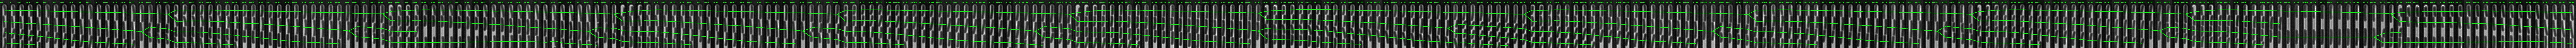

In [17]:
import cv2 as cv

read = cv.imread(files[0])
outfile = files[0].split('.')[0] + '.jpg'
cv.imwrite(outfile, read, [int(cv.IMWRITE_JPEG_QUALITY), 200])
display(Image(outfile, unconfined=True))
